In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Library

In [ ]:
import pandas as pd
import re
import string
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import pandas as pd
import numpy as np
import scipy as sp
import sklearn
import sys
import nltk
from nltk.corpus import stopwords
from gensim.models import ldamodel
import gensim.corpora
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
import pickle
from gensim.models import LdaModel
from gensim.corpora import Dictionary
# import pyLDAvis.gensim_models
import warnings
from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
import numpy as np
import pandas as pd
import string
import re
from tqdm._tqdm_notebook import tqdm_notebook,tnrange,tqdm
from collections import Counter,OrderedDict
from gensim import models,corpora
from gensim.summarization import summarize,keywords
import warnings

# import pyLDAvis.gensim_models
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pyLDAvis.gensim_models
# import gensim.models.phrases as gen
# from gensim.models.coherencemodel import CoherenceModel

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re, nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from wordcloud import WordCloud
import spacy
nlp = spacy.load('en_core_web_sm')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.colors as mcolors
from collections import Counter
from matplotlib.ticker import FuncFormatter
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# LDA 1 (output per kata)

## Data Pre-Processing

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/nolimit/topic_modelling/data_dashboard/demoghani_OnlineMedia_29-May-2022_29-Jun-2022_RQDlsw3Im2.csv', sep=';', usecols=['body'])

In [ ]:
data

,body
0,'Bandung: Gubernur Jawa Barat M Ridwan Kamil m...
1,'TRIBUNJAMBI.COM - PAN (Partai Amanat Nasional...
2,"'JAKARTA, KOMPAS.com - Wakil Ketua Umum (Waket..."
3,"'BANDUNG - Gubernur Jawa Barat, Ridwan Kamil, ..."
4,"'BANDUNG, KOMPAS.TV - Tema ini menjadi penging..."
...,...
7786,'JAKARTA - Tim SAR yang dipimpin Kepolisian Ma...
7787,'JAKARTA - Tim SAR yang dipimpin Kepolisian Ma...
7788,"'KOMPAS.TV - Duta Besar Indonesia untuk Swiss,..."
7789,"'Harianjogja.com, JAKARTA – Di tengah pencaria..."


In [ ]:
import re
import string

def clean_text(text):
  text = text.lower() #lowercase atau case folding
  text = re.sub('@[^\s]+', '', text) #remove username
  text = re.sub('\[.*?\]', '', text) # remove square brackets
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text) # remove URLs
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove punctuation
  text = re.sub('\w*\d\w*', '', text)
  text = re.sub('[‘’“”…]', '', text)
  text = re.sub('\n', '', text)
  return text

clean1 = lambda x: clean_text(x)

data['body'] = pd.DataFrame(data['body'].apply(clean1))

In [ ]:
my_file = open("/content/drive/MyDrive/nolimit/stopwords1.txt", "r")
stopwords_x = my_file.read()
# print(stopwords_x )

stopwords_list = stopwords_x.split(",")
my_file.close()

# print(stopwords_list)

In [ ]:
tambahan = ['yuk', 'moga', 'c', 'ya', 'yg', 'ga', 'kak', 'nya', 'the', 'to', 'and',
            "gak", "min", "udah", "aj", "aja", "pake", 'tol', 'bsi', 'dr', 'tp', 'jam',
            "a", "sampe", "nih", "cek", "dm", "bgt", 'kalo', 'nih', 'up', 'gue', 'banget', 'si', 'amp',
            "kota", "jabar", "provinsi", "nama", "indonesia", "bogor", "bandung", "kabupaten"]

In [ ]:
my_file = open("/content/drive/MyDrive/nolimit/topic_modelling/kota-kabupaten.txt", "r")
kota = my_file. readlines()
kota = [word.strip() for word in kota]
kota

['Aceh Barat',
 'Aceh Barat Daya',
 'Aceh Besar',
 'Aceh Jaya',
 'Aceh Selatan',
 'Aceh Singkil',
 'Aceh Tamiang',
 'Aceh Tengah',
 'Aceh Tenggara',
 'Aceh Timur',
 'Aceh Utara',
 'Agam',
 'Alor',
 'Ambon',
 'Asahan',
 'Asmat',
 'Batam',
 'Badung',
 'Balangan',
 'Balikpapan',
 'Banda Aceh',
 'Bandar Lampung',
 'Bandung',
 'Bandung Barat',
 'Banggai',
 'Banggai Kepulauan',
 'Bangka',
 'Bangka Barat',
 'Bangka Selatan',
 'Bangka Tengah',
 'Bangkalan',
 'Bangli',
 'Banjar',
 'Banjar Baru',
 'Banjarmasin',
 'Banjarnegara',
 'Bantaeng',
 'Bantul',
 'Banyu Asin',
 'Banyumas',
 'Banyuwangi',
 'Barito Kuala',
 'Barito Selatan',
 'Barito Timur',
 'Barito Utara',
 'Barru',
 'Baru',
 'Batang',
 'Batang Hari',
 'Batu',
 'Batu Bara',
 'Baubau',
 'Bekasi',
 'Belitung',
 'Belitung Timur',
 'Belu',
 'Bener Meriah',
 'Bengkalis',
 'Bengkayang',
 'Bengkulu',
 'Bengkulu Selatan',
 'Bengkulu Tengah',
 'Bengkulu Utara',
 'Berau',
 'Biak Numfor',
 'Bima',
 'Binjai',
 'Bintan',
 'Bireuen',
 'Bitung',
 'Blita

In [ ]:
tambahan.extend(kota)

In [ ]:
stopwords_list.extend(tambahan)

In [ ]:
data['text'] = data['body'].astype(str).str.lower()
data['text'] = data['text'].str.replace('\d+', '')

In [ ]:
#stopwords

from nltk.corpus import stopwords
nltk.download('stopwords')

sw = set().union(stopwords.words('indonesian'), stopwords_list)

data['text'] = pd.DataFrame(data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw)])))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


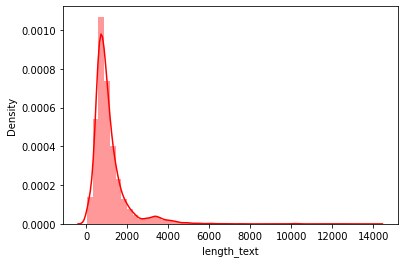

In [ ]:
data['length_text'] = data['text'].str.len()
sns.distplot(data['length_text'], color="r")
plt.show()

In [ ]:
processed_tweets = data['text'].tolist()
processed_tweets[:5]

['gubernur jawa barat m ridwan kamil pesan khusus wali bima arya sugiarto wali yana mulyana terkait tindak dugaan sara holywings harapkan mengambil tindakan setegastegasnya aspek hukum namanya kepatutan pelanggaran holywings ridwan kamil gedung merdeka selasa juni kewenangan izin usaha jawa barat pemerintah daerah tingkat kabupatenkota tangan pemerintah kewenangannya jakarta gubernur jakarta seindonesia raya kewenangan izin hiburan hotel restoran wali bupati khusus jawa barat holywings elvis kafe perusahaan holywings baca pemerintah dki jakarta dinas penanaman modal pelayanan terpadu pintu dpmptsp resmi mencabut izin usaha outlet holywings lokasi jakarta pencabutan izin dpmptsp berdasarkan rekomendasi temuan pelanggaran organisasi perangkat daerah opd dinas pariwisata ekonomi kreatif disparekraf dki jakarta dinas perindustrian perdagangan koperasi ukm dppkukm dki jakarta kepala dinas penanaman modal pelayanan terpadu pintu dki jakarta benny agus chandra dikutip ppidjakartagodid jakarta

In [ ]:
processed_tweets = [d.split() for d in processed_tweets]

In [ ]:
processed_tweets[:5]

[['gubernur',
  'jawa',
  'barat',
  'm',
  'ridwan',
  'kamil',
  'pesan',
  'khusus',
  'wali',
  'bima',
  'arya',
  'sugiarto',
  'wali',
  'yana',
  'mulyana',
  'terkait',
  'tindak',
  'dugaan',
  'sara',
  'holywings',
  'harapkan',
  'mengambil',
  'tindakan',
  'setegastegasnya',
  'aspek',
  'hukum',
  'namanya',
  'kepatutan',
  'pelanggaran',
  'holywings',
  'ridwan',
  'kamil',
  'gedung',
  'merdeka',
  'selasa',
  'juni',
  'kewenangan',
  'izin',
  'usaha',
  'jawa',
  'barat',
  'pemerintah',
  'daerah',
  'tingkat',
  'kabupatenkota',
  'tangan',
  'pemerintah',
  'kewenangannya',
  'jakarta',
  'gubernur',
  'jakarta',
  'seindonesia',
  'raya',
  'kewenangan',
  'izin',
  'hiburan',
  'hotel',
  'restoran',
  'wali',
  'bupati',
  'khusus',
  'jawa',
  'barat',
  'holywings',
  'elvis',
  'kafe',
  'perusahaan',
  'holywings',
  'baca',
  'pemerintah',
  'dki',
  'jakarta',
  'dinas',
  'penanaman',
  'modal',
  'pelayanan',
  'terpadu',
  'pintu',
  'dpmptsp',
  

In [ ]:
dictionary = gensim.corpora.Dictionary(processed_tweets)
print(len(dictionary))

36606


In [ ]:
print(len(dictionary))

100


In [ ]:
print(dictionary)

Dictionary(100 unique tokens: ['berita', 'daerah', 'dikutip', 'dinas', 'gedung']...)


In [ ]:
bow_corpus = [dictionary.doc2bow(twt) for twt in processed_tweets]
bow_corpus[0]

[(0, 4),
 (1, 3),
 (2, 1),
 (3, 4),
 (4, 1),
 (5, 8),
 (6, 2),
 (7, 2),
 (8, 1),
 (9, 1),
 (10, 2),
 (11, 3),
 (12, 1),
 (13, 4),
 (14, 1)]

In [ ]:
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.4345931917244556),
 (1, 0.3140542465050128),
 (2, 0.09840435009325095),
 (3, 0.4555663018576527),
 (4, 0.07450599712029167),
 (5, 0.37630541371642806),
 (6, 0.22195260017770907),
 (7, 0.12549751904938308),
 (8, 0.09622734258143409),
 (9, 0.09644096900412077),
 (10, 0.20610787593638324),
 (11, 0.313452949233899),
 (12, 0.0728512496401551),
 (13, 0.3347219606879507),
 (14, 0.08040683447889001)]


In [ ]:
num_topics = 5

In [ ]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100)

## LDA

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                       num_topics = num_topics,
                                       id2word = dictionary,
                                       passes = 2,
                                       workers = 4)
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))

topic = lda_model.print_topics()

from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_tweets, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

def Convert(string):
    li = list(string.split(" + "))
    return li

y = []
for i in range(len(topic)):
  y.append(Convert(topic[i][1]))

hasil = pd.DataFrame(y).T

hasil.replace('\d+', '', regex=True, inplace=True)
hasil.replace('\.', '', regex=True, inplace=True)
hasil.replace('\*', '', regex=True, inplace=True)
hasil.replace('\-', '', regex=True, inplace=True)

hasil

Topic: 0 
Words: 0.058*"keluarga" + 0.039*"emil" + 0.034*"kang" + 0.032*"anak" + 0.031*"gedung" + 0.029*"jakarta" + 0.026*"orang" + 0.026*"putra" + 0.023*"sungai" + 0.022*"pakuan"
Topic: 1 
Words: 0.057*"jenazah" + 0.055*"keluarga" + 0.028*"atalia" + 0.024*"allah" + 0.024*"sungai" + 0.023*"putra" + 0.023*"jakarta" + 0.018*"presiden" + 0.018*"minggu" + 0.017*"menteri"
Topic: 2 
Words: 0.088*"sungai" + 0.072*"pencarian" + 0.057*"aare" + 0.038*"bern" + 0.029*"anak" + 0.022*"keluarga" + 0.021*"atalia" + 0.021*"hilang" + 0.020*"putra" + 0.020*"mei"
Topic: 3 
Words: 0.084*"jenazah" + 0.042*"pemakaman" + 0.032*"keluarga" + 0.030*"ditemukan" + 0.026*"emil" + 0.022*"putra" + 0.022*"lokasi" + 0.021*"jasad" + 0.020*"masyarakat" + 0.019*"bern"
Topic: 4 
Words: 0.056*"bern" + 0.054*"pencarian" + 0.040*"sungai" + 0.037*"aare" + 0.033*"jakarta" + 0.025*"juni" + 0.024*"presiden" + 0.022*"masyarakat" + 0.021*"hilang" + 0.021*"ditemukan"

Coherence Score:  0.5979259810329273


,0,1,2,3,4
0,"""keluarga""","""jenazah""","""sungai""","""jenazah""","""bern"""
1,"""emil""","""keluarga""","""pencarian""","""pemakaman""","""pencarian"""
2,"""kang""","""atalia""","""aare""","""keluarga""","""sungai"""
3,"""anak""","""allah""","""bern""","""ditemukan""","""aare"""
4,"""gedung""","""sungai""","""anak""","""emil""","""jakarta"""
5,"""jakarta""","""putra""","""keluarga""","""putra""","""juni"""
6,"""orang""","""jakarta""","""atalia""","""lokasi""","""presiden"""
7,"""putra""","""presiden""","""hilang""","""jasad""","""masyarakat"""
8,"""sungai""","""minggu""","""putra""","""masyarakat""","""hilang"""
9,"""pakuan""","""menteri""","""mei""","""bern""","""ditemukan"""


## LSA

In [ ]:
# LSA

lsa_model = gensim.models.LsiModel(corpus_tfidf,
                                   num_topics = num_topics,
                                   id2word=dictionary)
for idx, topic in lsa_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    # print("\n")

topic2 = lsa_model.print_topics()

from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lsa = CoherenceModel(model=lsa_model, texts=processed_tweets, dictionary=dictionary, coherence='c_v')
coherence_lsa = coherence_model_lsa.get_coherence()
print('\nCoherence Score: ', coherence_lsa)

# tes = pd.DataFrame()

def Convert(string):
    li = list(string.split(" + "))
    return li

y = []
for i in range(len(topic2)):
  y.append(Convert(topic2[i][1]))

hasil2 = pd.DataFrame(y).T
hasil2.replace('\d+', '', regex=True, inplace=True)
hasil2.replace('\.', '', regex=True, inplace=True)
hasil2.replace('\*', '', regex=True, inplace=True)
hasil2.replace('\-', '', regex=True, inplace=True)

hasil2

Topic: 0 
Words: 0.274*"jenazah" + 0.241*"pencarian" + 0.187*"bern" + 0.183*"keluarga" + 0.170*"sungai" + 0.161*"emil" + 0.150*"aare" + 0.149*"atalia" + 0.146*"kang" + 0.144*"ditemukan"
Topic: 1 
Words: 0.382*"presiden" + -0.372*"pencarian" + 0.344*"calon" + 0.276*"ketua" + -0.225*"bern" + 0.211*"menteri" + 0.192*"jenazah" + -0.181*"sungai" + -0.161*"aare" + 0.159*"jakarta"
Topic: 2 
Words: 0.590*"jenazah" + -0.303*"presiden" + -0.283*"calon" + 0.257*"pemakaman" + -0.220*"ketua" + 0.205*"pakuan" + -0.202*"pencarian" + 0.188*"wib" + 0.165*"gedung" + -0.137*"menteri"
Topic: 3 
Words: 0.376*"emil" + 0.352*"kang" + -0.331*"jenazah" + -0.197*"pencarian" + -0.191*"presiden" + 0.190*"atalia" + 0.162*"allah" + -0.156*"calon" + -0.152*"bern" + 0.152*"akun"
Topic: 4 
Words: 0.362*"emil" + 0.327*"kang" + -0.319*"atalia" + -0.305*"video" + -0.285*"akun" + -0.244*"instagram" + -0.232*"sang" + -0.208*"praratya" + 0.183*"pencarian" + 0.171*"gedung"

Coherence Score:  0.5774537974617202


,0,1,2,3,4
0,"""jenazah""","""presiden""","""jenazah""","""emil""","""emil"""
1,"""pencarian""","""pencarian""","""presiden""","""kang""","""kang"""
2,"""bern""","""calon""","""calon""","""jenazah""","""atalia"""
3,"""keluarga""","""ketua""","""pemakaman""","""pencarian""","""video"""
4,"""sungai""","""bern""","""ketua""","""presiden""","""akun"""
5,"""emil""","""menteri""","""pakuan""","""atalia""","""instagram"""
6,"""aare""","""jenazah""","""pencarian""","""allah""","""sang"""
7,"""atalia""","""sungai""","""wib""","""calon""","""praratya"""
8,"""kang""","""aare""","""gedung""","""bern""","""pencarian"""
9,"""ditemukan""","""jakarta""","""menteri""","""akun""","""gedung"""


## LDA + TF-IDF

In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf,
                                             num_topics = num_topics,
                                             id2word = dictionary,
                                             passes = 2,
                                             workers=4)

for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))

topic3 = lda_model_tfidf.print_topics()

from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_tfidf = CoherenceModel(model=lda_model_tfidf, texts=processed_tweets, dictionary=dictionary, coherence='c_v')
coherence_tfidf = coherence_model_tfidf.get_coherence()
print('\nCoherence Score: ', coherence_tfidf)

# tes = pd.DataFrame()

def Convert(string):
    li = list(string.split(" + "))
    return li

y = []
for i in range(len(topic3)):
  y.append(Convert(topic3[i][1]))

hasil3 = pd.DataFrame(y).T
hasil3.replace('\d+', '', regex=True, inplace=True)
hasil3.replace('\.', '', regex=True, inplace=True)
hasil3.replace('\*', '', regex=True, inplace=True)
hasil3.replace('\-', '', regex=True, inplace=True)

hasil3

Topic: 0 
Words: 0.102*"eril" + 0.036*"atalia" + 0.032*"anak" + 0.030*"mumtadz" + 0.029*"emmeril" + 0.029*"kahn" + 0.028*"praratya" + 0.027*"putra" + 0.026*"keluarga" + 0.022*"kang"
Topic: 1 
Words: 0.038*"eril" + 0.034*"emil" + 0.029*"kang" + 0.029*"kesehatan" + 0.028*"emmeril" + 0.028*"keluarga" + 0.027*"video" + 0.024*"mumtadz" + 0.021*"kahn" + 0.020*"jumat"
Topic: 2 
Words: 0.042*"persen" + 0.029*"pan" + 0.028*"jakarta" + 0.024*"daerah" + 0.022*"pemerintah" + 0.021*"emil" + 0.021*"anies" + 0.020*"kesehatan" + 0.020*"survei" + 0.019*"partai"
Topic: 3 
Words: 0.059*"pariwisata" + 0.042*"orang" + 0.030*"atalia" + 0.025*"masyarakat" + 0.024*"wali" + 0.023*"sosial" + 0.022*"media" + 0.020*"memiliki" + 0.019*"berharap" + 0.019*"gedung"
Topic: 4 
Words: 0.059*"akun" + 0.048*"emil" + 0.047*"kang" + 0.043*"instagram" + 0.040*"warga" + 0.030*"minggu" + 0.030*"rumah" + 0.025*"orang" + 0.022*"calon" + 0.021*"hadir"

Coherence Score:  0.4161922639321767


,0,1,2,3,4
0,"""eril""","""eril""","""persen""","""pariwisata""","""akun"""
1,"""atalia""","""emil""","""pan""","""orang""","""emil"""
2,"""anak""","""kang""","""jakarta""","""atalia""","""kang"""
3,"""mumtadz""","""kesehatan""","""daerah""","""masyarakat""","""instagram"""
4,"""emmeril""","""emmeril""","""pemerintah""","""wali""","""warga"""
5,"""kahn""","""keluarga""","""emil""","""sosial""","""minggu"""
6,"""praratya""","""video""","""anies""","""media""","""rumah"""
7,"""putra""","""mumtadz""","""kesehatan""","""memiliki""","""orang"""
8,"""keluarga""","""kahn""","""survei""","""berharap""","""calon"""
9,"""kang""","""jumat""","""partai""","""gedung""","""hadir"""


## Hyperparameter Tuning

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus, num_topics=num_topics, id2word = dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=processed_tweets, start=2, limit=11, step=1)

In [ ]:
coherence_values

[0.6328193459430735,
 0.5742560201256331,
 0.590121514049959,
 0.6082551771268352,
 0.5779831619244004,
 0.5563341166523135,
 0.5720745903312743,
 0.5916767465757646,
 0.5563017492511821]

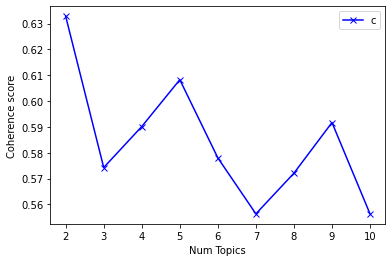

In [ ]:
# Show graph
limit=11; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values, 'bx-')
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.6328
Num Topics = 3  has Coherence Value of 0.5743
Num Topics = 4  has Coherence Value of 0.5901
Num Topics = 5  has Coherence Value of 0.6083
Num Topics = 6  has Coherence Value of 0.578
Num Topics = 7  has Coherence Value of 0.5563
Num Topics = 8  has Coherence Value of 0.5721
Num Topics = 9  has Coherence Value of 0.5917
Num Topics = 10  has Coherence Value of 0.5563


# LDA 2 (output kalimat)

In [ ]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#stop-words
stop_words=set(nltk.corpus.stopwords.words('indonesian'))

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/nolimit/data_fix_merge/sentiment_fix_balance_juni.csv')

In [ ]:
df = df[['clean_fix']]

In [ ]:
df['text'] = df['clean_fix'].astype(str)

In [ ]:
my_file = open("/content/drive/MyDrive/nolimit/stopwords1.txt", "r")
stopwords_x = my_file.read()
# print(stopwords_x )

stopwords_list = stopwords_x.split(",")
my_file.close()

# print(stopwords_list)

tambahan = ['yuk', 'moga', 'c', 'ya', 'yg', 'ga', 'kak', 'nya', 'the', 'to', 'and',
            "gak", "min", "udah", "aj", "aja", "pake", 'tol', 'bsi', 'dr', 'tp', 'jam',
            "a", "sampe", "nih", "cek", "dm", "bgt", 'kalo', 'nih', 'up', 'gue', 'banget', 'si', 'amp']

stopwords_list.extend(tambahan)

#stopwords

from nltk.corpus import stopwords
# additional = ['kompascom', 'kompas', 'jakarta', 'samarinda']
sw = set().union(stopwords.words('indonesian'), stopwords_list)

df['text'] = pd.DataFrame(df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw)])))

In [ ]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)

In [ ]:
vect_text=vect.fit_transform(df['text'])

In [ ]:
idf=vect.idf_

In [ ]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)

In [ ]:
print(lsa_top)
print(lsa_top.shape)  # (no_of_doc*no_of_topics)

[[ 2.15440741e-02  8.95393472e-02 -6.00663462e-03  1.00549368e-02
   2.95391257e-01]
 [ 1.15082095e-02  1.10904519e-02  9.31959483e-03  3.76200112e-03
   4.29245657e-02]
 [ 1.09858378e-02  3.37007573e-02  4.58236965e-02  2.82109197e-02
   3.15723805e-01]
 ...
 [ 1.85042575e-02  6.83967431e-02 -2.72588182e-03  5.84220237e-03
   7.01964638e-02]
 [ 4.51146693e-03  1.31480316e-02  4.04880074e-03  2.59856148e-03
   3.52765258e-02]
 [ 9.20636380e-03  1.82578252e-02 -2.37827604e-03  1.64428207e-04
   1.79749859e-03]]
(25309, 5)


In [ ]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)


Document 0 :
Topic  0  :  2.1544074149686647
Topic  1  :  8.953934722339035
Topic  2  :  -0.6006634618721424
Topic  3  :  1.0054936774671932
Topic  4  :  29.53912573461889


In [ ]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(5, 1000)
[[0.0017441  0.0124862  0.0011231  ... 0.00097502 0.00094267 0.00083534]
 [0.00465138 0.00535751 0.00295839 ... 0.00111437 0.0021088  0.00190849]
 [0.00179148 0.00101239 0.00208834 ... 0.00030316 0.00305576 0.00042923]
 [0.0138889  0.00015497 0.002194   ... 0.00067843 0.00139845 0.01852448]
 [0.0227545  0.00629292 0.01470306 ... 0.00246217 0.00476978 0.00124307]]


In [ ]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
indomie goreng paket makan enak ayam mie tolong kirim kuah 

Topic 1: 
paket tolong kirim resi terima halo mohon bantu kasih gimana 

Topic 2: 
tambang izin cabut usaha jokowi ribu presiden hutan kebun hgu 

Topic 3: 
kuissahabatsyariah mudharabah akad indonesia bismillah syariah bank follow sukses ayo 

Topic 4: 
terima aqua kasih mohon erick thohir maaf bumn indonesia menteri 



In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=5,learning_method='online',random_state=42,max_iter=1)
# n_components is the number of topics

lda_top=lda_model.fit_transform(vect_text)

In [ ]:
# composition of doc 0 for eg
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  6.7027876595503395 %
Topic  1 :  6.702787325605593 %
Topic  2 :  6.702784655531444 %
Topic  3 :  6.764311257446459 %
Topic  4 :  73.12732910186617 %


In [ ]:
print(lda_model.components_)
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

[[ 0.20107642 32.60966141  2.52725263 ...  0.20045648  0.20803715
   0.20408109]
 [ 0.20058381 44.81122833  0.20536838 ... 26.32286124  0.2188261
   6.25423122]
 [ 0.20177618  0.20483545 51.70403777 ...  0.20898444 30.35345672
   0.20267145]
 [ 0.20038493  0.20266634  0.20635897 ...  0.20558198  0.20161795
   0.204336  ]
 [36.13330331  0.20135153  0.20426006 ...  0.20037668  0.20090931
   4.15609851]]
(5, 1000)


In [ ]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
aqua indomie gimana bikin sih dah goreng kurir main beli 

Topic 1: 
indomie makan bantul pas padat gin lu wkwk kayak mah 

Topic 2: 
tambang senayan oli ganti indonesia mandalika kerja jalan usaha anak 

Topic 3: 
gbk paket tolong terima kasih kirim bantu sicepat halo mohon 

Topic 4: 
kapal km bank mas iya yaa menang maaf bayar syariah 



# LDA 3 (word2vec)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re, nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from wordcloud import WordCloud
import spacy
nlp = spacy.load('en_core_web_sm')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.colors as mcolors
from collections import Counter
from matplotlib.ticker import FuncFormatter
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Data Pre-Processing

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/nolimit/topic_modelling/data_dashboard/Politik_OnlineMedia_29-Jun-2022_06-Jul-2022_5OnBuwqw0r.csv', sep=';', usecols=['body'])

data.head()

,body
0,'ASKARA - Tidak banyak musisi country di Indon...
1,"'Surabaya, JNN.co.id – Nama Erick Thohir mengu..."
2,"'TRIBUNNEWS.COM, JAKARTA - Polemik pergantian ..."
3,"'TRIBUNNEWS.COM, JAKARTA - Peluang Ahmad Riza ..."
4,'Jakarta - Gubernur Jawa Tengah Ganjar Pranow...


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency distribution of number of words for each text extracted')

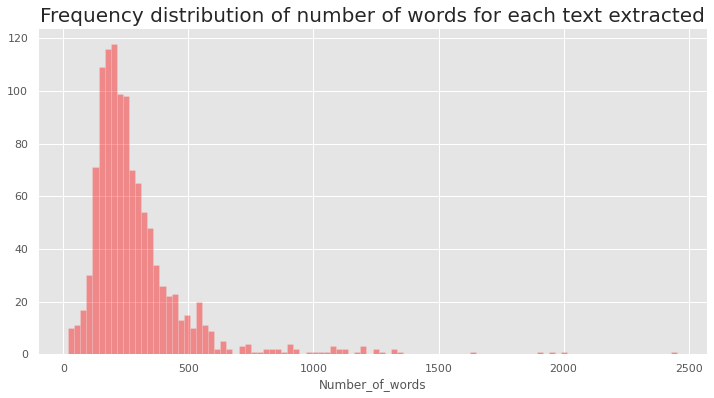

In [ ]:
data['Number_of_words'] = data['body'].apply(lambda x:len(str(x).split()))

plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.distplot(data['Number_of_words'],kde = False,color="red", bins = 100)
plt.title("Frequency distribution of number of words for each text extracted", size=20)

Text(0.5, 1.0, 'Word frequency distribution using Box plot')

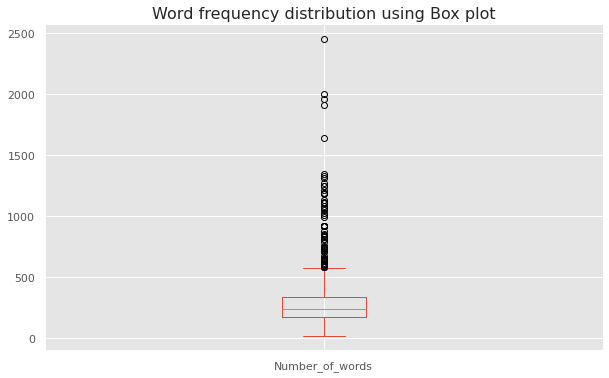

In [ ]:
plt.figure(figsize = (10,6))
data["Number_of_words"].plot(kind="box")
plt.title("Word frequency distribution using Box plot", size = 16)

In [ ]:
import re
import string

def clean_text(text):
  text = text.lower() #lowercase atau case folding
  text = re.sub('@[^\s]+', '', text) #remove username
  text = re.sub('\[.*?\]', '', text) # remove square brackets
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text) # remove URLs
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove punctuation
  text = re.sub('\w*\d\w*', '', text)
  text = re.sub('[‘’“”…]', '', text)
  text = re.sub('\n', '', text)
  return text

clean1 = lambda x: clean_text(x)

data['body'] = pd.DataFrame(data['body'].apply(clean1))

In [ ]:
my_file = open("/content/drive/MyDrive/nolimit/stopwords1.txt", "r")
stopwords_x = my_file.read()
# print(stopwords_x )

stopwords_list = stopwords_x.split(",")
my_file.close()

# print(stopwords_list)

In [ ]:
tambahan = ['yuk', 'moga', 'c', 'ya', 'yg', 'ga', 'kak', 'nya', 'the', 'to', 'and',
            "gak", "min", "udah", "aj", "aja", "pake", 'tol', 'bsi', 'dr', 'tp', 'jam',
            "a", "sampe", "nih", "cek", "dm", "bgt", 'kalo', 'nih', 'up', 'gue', 'banget', 'si', 'amp',
            "kota", "jabar", "provinsi", "nama", "indonesia", "bogor", "bandung", "kabupaten",
            'tribunnewscom', 'jakarta', 'in', 'be', 'of', 'ktt', 'anies', 'baswedan']

In [ ]:
# my_file = open("/content/drive/MyDrive/nolimit/topic_modelling/kota-kabupaten.txt", "r")
# kota = my_file. readlines()
# kota = [word.strip() for word in kota]
# kota

kota = []
with open("/content/drive/MyDrive/nolimit/topic_modelling/kota-kabupaten.txt", "r") as fileinput:
   for line in fileinput:
       kota.append(line.lower())

kota = [word.strip() for word in kota]
kota

['aceh barat',
 'aceh barat daya',
 'aceh besar',
 'aceh jaya',
 'aceh selatan',
 'aceh singkil',
 'aceh tamiang',
 'aceh tengah',
 'aceh tenggara',
 'aceh timur',
 'aceh utara',
 'agam',
 'alor',
 'ambon',
 'asahan',
 'asmat',
 'batam',
 'badung',
 'balangan',
 'balikpapan',
 'banda aceh',
 'bandar lampung',
 'bandung',
 'bandung barat',
 'banggai',
 'banggai kepulauan',
 'bangka',
 'bangka barat',
 'bangka selatan',
 'bangka tengah',
 'bangkalan',
 'bangli',
 'banjar',
 'banjar baru',
 'banjarmasin',
 'banjarnegara',
 'bantaeng',
 'bantul',
 'banyu asin',
 'banyumas',
 'banyuwangi',
 'barito kuala',
 'barito selatan',
 'barito timur',
 'barito utara',
 'barru',
 'baru',
 'batang',
 'batang hari',
 'batu',
 'batu bara',
 'baubau',
 'bekasi',
 'belitung',
 'belitung timur',
 'belu',
 'bener meriah',
 'bengkalis',
 'bengkayang',
 'bengkulu',
 'bengkulu selatan',
 'bengkulu tengah',
 'bengkulu utara',
 'berau',
 'biak numfor',
 'bima',
 'binjai',
 'bintan',
 'bireuen',
 'bitung',
 'blita

In [ ]:
tambahan.extend(kota)

In [ ]:
stopwords_list.extend(tambahan)

In [ ]:
data['text'] = data['body'].astype(str).str.lower()
data['text'] = data['text'].str.replace('\d+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
#stopwords

from nltk.corpus import stopwords
nltk.download('stopwords')

sw = set().union(stopwords.words('indonesian'), stopwords_list)

data['text'] = pd.DataFrame(data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw)])))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


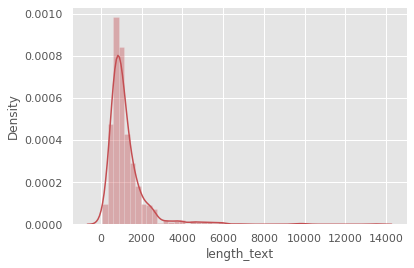

In [ ]:
data['length_text'] = data['text'].str.len()
sns.distplot(data['length_text'], color="r")
plt.show()

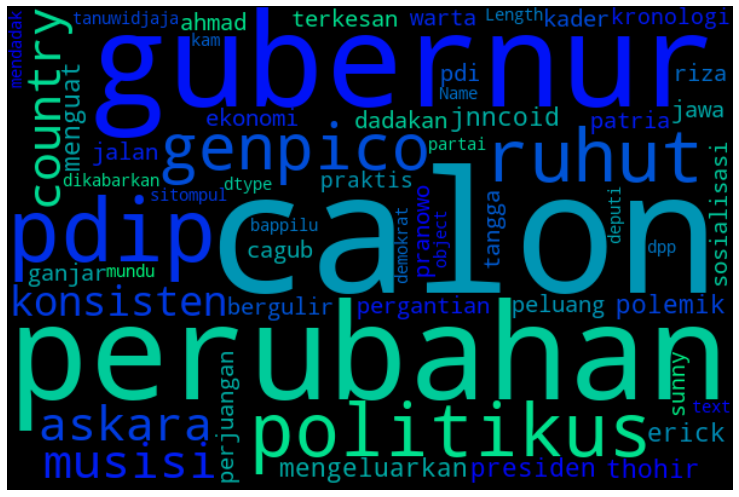

In [ ]:
cloud=WordCloud(colormap="winter",width=600,height=400).generate(str(data["text"]))
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

In [ ]:
import nltk
nltk.download('punkt')

data["tokenized"]=data["text"].apply(lambda x: nltk.word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
nltk.download('omw-1.4')

def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i,pos='v') for i in text]
    return lem_text
data["lemmatized"]=data["tokenized"].apply(lambda x: word_lemmatizer(x))
data["lemmatize_joined"]=data["lemmatized"].apply(lambda x: ' '.join(x))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
data

,body,Number_of_words,text,length_text,tokenized,lemmatized,lemmatize_joined
0,askara tidak banyak musisi country di indones...,303,askara musisi country konsisten mengeluarkan k...,1277,"[askara, musisi, country, konsisten, mengeluar...","[askara, musisi, country, konsisten, mengeluar...",askara musisi country konsisten mengeluarkan k...
1,surabaya jnncoid – nama erick thohir menguat s...,429,jnncoid – erick thohir menguat calon presiden ...,1884,"[jnncoid, –, erick, thohir, menguat, calon, pr...","[jnncoid, –, erick, thohir, menguat, calon, pr...",jnncoid – erick thohir menguat calon presiden ...
2,tribunnewscom jakarta polemik pergantian atau...,280,polemik pergantian perubahan jalan bergulir an...,939,"[polemik, pergantian, perubahan, jalan, bergul...","[polemik, pergantian, perubahan, jalan, bergul...",polemik pergantian perubahan jalan bergulir an...
3,tribunnewscom jakarta peluang ahmad riza patr...,307,peluang ahmad riza patria calon gubernur cagub...,1272,"[peluang, ahmad, riza, patria, calon, gubernur...","[peluang, ahmad, riza, patria, calon, gubernur...",peluang ahmad riza patria calon gubernur cagub...
4,jakarta gubernur jawa tengah ganjar pranowo ...,299,gubernur jawa ganjar pranowo kader pdip tangga...,1256,"[gubernur, jawa, ganjar, pranowo, kader, pdip,...","[gubernur, jawa, ganjar, pranowo, kader, pdip,...",gubernur jawa ganjar pranowo kader pdip tangga...
...,...,...,...,...,...,...,...
1151,warta ekonomi jakarta politikus pdi perjuang...,277,warta ekonomi politikus pdi perjuangan ruhut s...,1131,"[warta, ekonomi, politikus, pdi, perjuangan, r...","[warta, ekonomi, politikus, pdi, perjuangan, r...",warta ekonomi politikus pdi perjuangan ruhut s...
1152,perubahan nama terkesan dadakan tanpa ada sosi...,187,perubahan terkesan dadakan sosialisasi praktis...,783,"[perubahan, terkesan, dadakan, sosialisasi, pr...","[perubahan, terkesan, dadakan, sosialisasi, pr...",perubahan terkesan dadakan sosialisasi praktis...
1153,kronologi jakarta â sunny tanuwidjaja dikabark...,216,kronologi â sunny tanuwidjaja dikabarkan mundu...,958,"[kronologi, â, sunny, tanuwidjaja, dikabarkan,...","[kronologi, â, sunny, tanuwidjaja, dikabarkan,...",kronologi â sunny tanuwidjaja dikabarkan mundu...
1154,genpico politikus pdip ruhut sitompul mendada...,128,genpico politikus pdip ruhut sitompul mendadak...,506,"[genpico, politikus, pdip, ruhut, sitompul, me...","[genpico, politikus, pdip, ruhut, sitompul, me...",genpico politikus pdip ruhut sitompul mendadak...


In [ ]:
data['Number_of_words_for_cleaned'] = data['lemmatize_joined'].apply(lambda x:len(str(x).split()))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency distribution of number of words for each text extracted after removing stopwords and lemmatization')

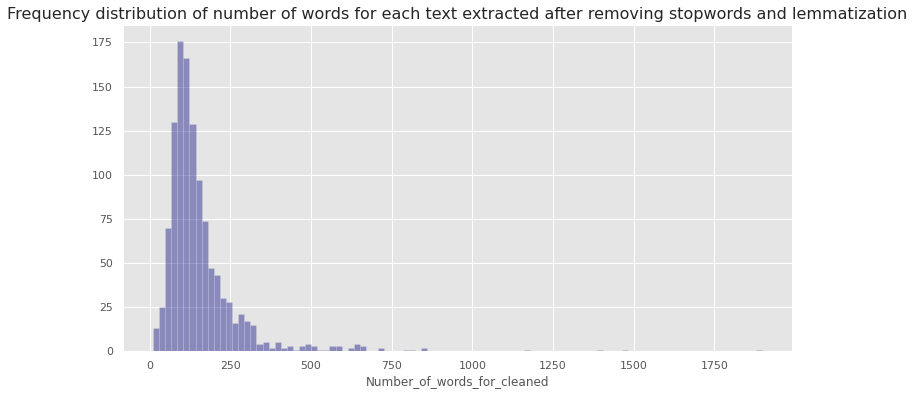

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.distplot(data['Number_of_words_for_cleaned'],kde = False, color= "navy", bins = 100)
plt.title("Frequency distribution of number of words for each text extracted after removing stopwords and lemmatization", size=16)

In [ ]:
data.drop(data[data["Number_of_words_for_cleaned"]>750].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency distribution of no of words in the documents after removing docs containing > 750 words')

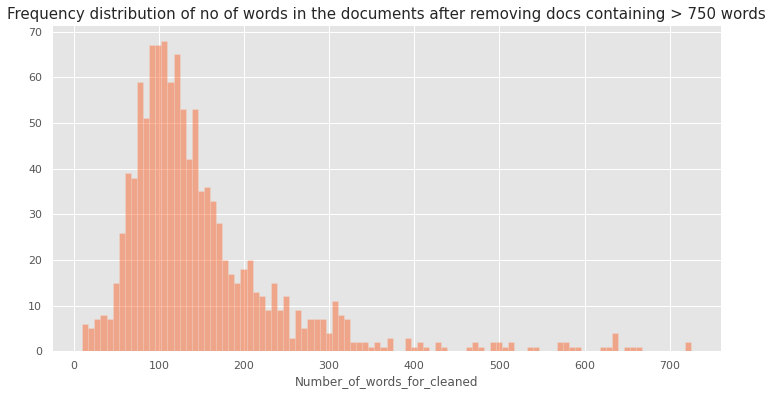

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.distplot(data['Number_of_words_for_cleaned'],kde = False, color= "orangered", bins = 100)
plt.title("Frequency distribution of no of words in the documents after removing docs containing > 750 words", size=15)

Text(0.5, 1.0, '30 most frequent words')

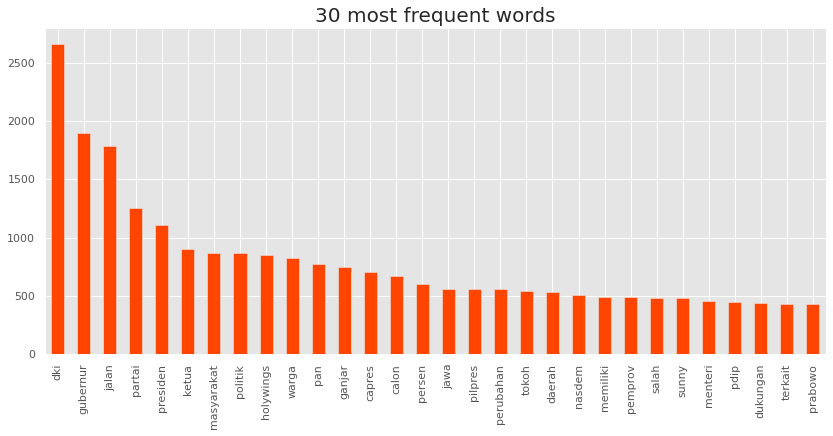

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
freq=pd.Series(" ".join(data["lemmatize_joined"]).split()).value_counts()[:30]
freq.plot(kind="bar", color = "orangered")
plt.title("30 most frequent words",size=20)

## Vectorization using Word2vec

In [ ]:
tokens = data["lemmatize_joined"].apply(lambda x: nltk.word_tokenize(x))

In [ ]:
tokens

0       [askara, musisi, country, konsisten, mengeluar...
1       [jnncoid, –, erick, thohir, menguat, calon, pr...
2       [polemik, pergantian, perubahan, jalan, bergul...
3       [peluang, ahmad, riza, patria, calon, gubernur...
4       [gubernur, jawa, ganjar, pranowo, kader, pdip,...
                              ...                        
1151    [warta, ekonomi, politikus, pdi, perjuangan, r...
1152    [perubahan, terkesan, dadakan, sosialisasi, pr...
1153    [kronologi, â, sunny, tanuwidjaja, dikabarkan,...
1154    [genpico, politikus, pdip, ruhut, sitompul, me...
1155    [genpico, deputi, bappilu, dpp, partai, demokr...
Name: lemmatize_joined, Length: 1148, dtype: object

In [ ]:
w2v_model = Word2Vec(tokens,
                     min_count=600,
                     window=10,
                     size=250,
                     alpha=0.03,
                     min_alpha=0.0007,
                     workers = 4,
                     seed = 42)

In [ ]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)

    tsne_model = TSNE(perplexity=50, n_components=2, init='pca', n_iter=2000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(15, 13))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


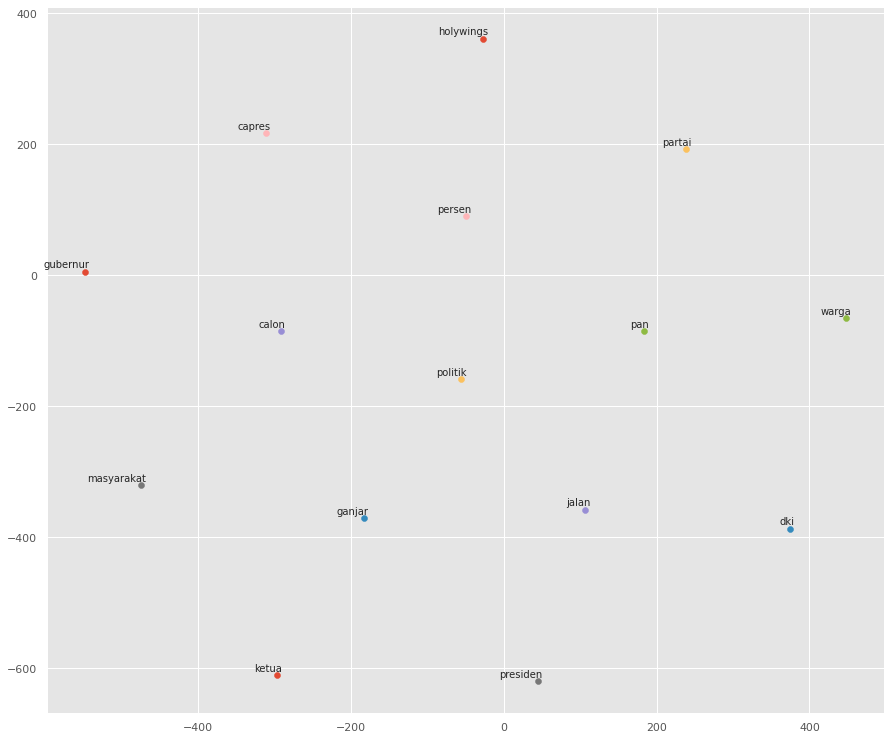

In [ ]:
tsne_plot(w2v_model)

In [ ]:
w2v_model_2 = Word2Vec(tokens,
                     min_count=1000,
                     window=10,
                     size=250,
                     alpha=0.03,
                     min_alpha=0.0007,
                     workers = 4,
                     seed=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


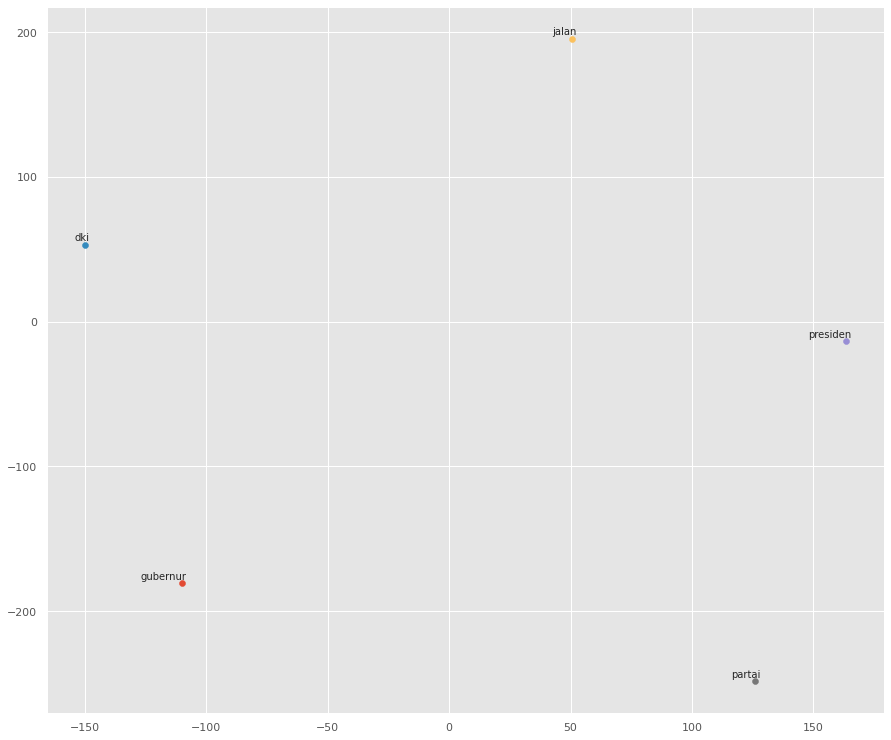

In [ ]:
tsne_plot(w2v_model_2)

## Topic Modelling using LDA

In [ ]:
dictionary = corpora.Dictionary(data["lemmatized"])
doc_term_matrix = [dictionary.doc2bow(rev) for rev in data["lemmatized"]]

In [ ]:
import timeit

start = timeit.default_timer()

LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=5, random_state=100,
                chunksize=200, passes=100)

lsa_model = gensim.models.LsiModel(doc_term_matrix,
                                   num_topics = 5,
                                   id2word=dictionary)

stop = timeit.default_timer()

print('Time: ', stop - start)

Time:  59.72425105000002


In [ ]:
lda_model.print_topics()

[(0,
  '-0.725*"jalan" + -0.305*"dki" + -0.189*"gubernur" + -0.164*"warga" + -0.162*"perubahan" + -0.128*"masyarakat" + -0.125*"partai" + -0.111*"tokoh" + -0.100*"betawi" + -0.091*"ketua"'),
 (1,
  '-0.462*"jalan" + 0.355*"partai" + 0.224*"presiden" + 0.187*"politik" + 0.164*"capres" + 0.162*"ketua" + 0.162*"pan" + 0.162*"ganjar" + 0.153*"calon" + 0.141*"persen"'),
 (2,
  '-0.502*"dki" + -0.399*"holywings" + 0.279*"jalan" + 0.227*"partai" + -0.163*"gubernur" + -0.131*"usaha" + -0.129*"izin" + -0.118*"pemprov" + 0.103*"presiden" + 0.102*"capres"'),
 (3,
  '0.593*"pan" + 0.227*"dpd" + 0.201*"erick" + -0.200*"politik" + -0.197*"partai" + 0.193*"rakerda" + 0.180*"thohir" + 0.160*"dpw" + -0.150*"pdip" + -0.134*"sunny"'),
 (4,
  '-0.597*"holywings" + -0.173*"usaha" + -0.170*"izin" + -0.151*"partai" + 0.148*"air" + -0.144*"outlet" + 0.124*"udara" + 0.117*"masyarakat" + 0.116*"warga" + -0.112*"jalan"')]

IndexError: ignored

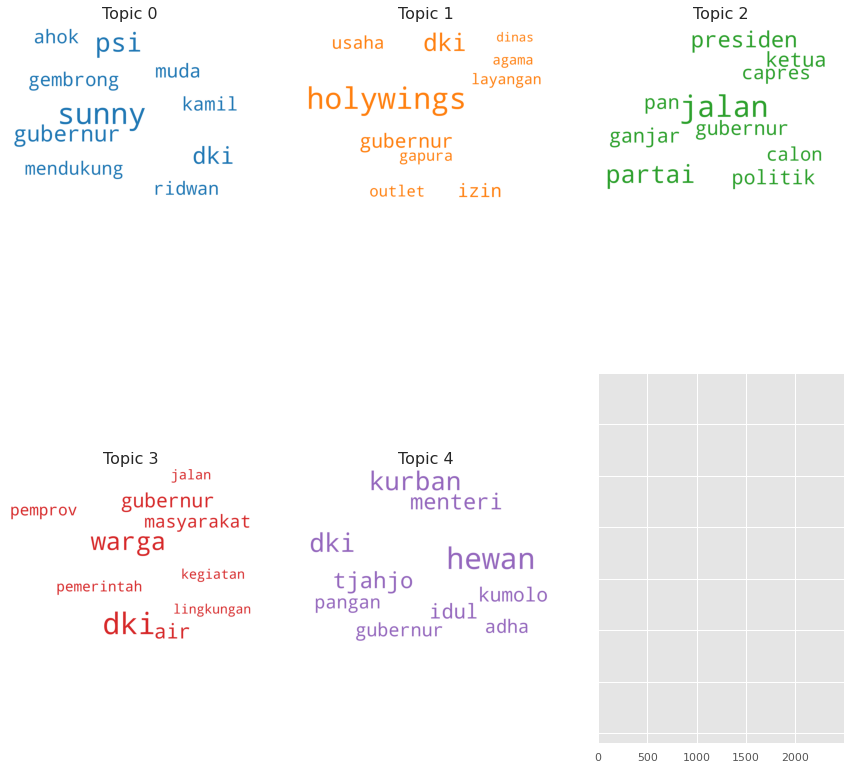

In [ ]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 3, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

In [ ]:
# Visualize the topics
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.251284 -0.025953       1        1  38.799019
0      0.090536 -0.254040       2        1  18.921221
3      0.027602  0.103339       3        1  18.043889
1     -0.034138  0.079066       4        1  17.052521
4      0.167285  0.097589       5        1   7.183350, topic_info=           Term         Freq        Total Category  logprob  loglift
2880  holywings   880.000000   880.000000  Default  30.0000  30.0000
268       jalan  1810.000000  1810.000000  Default  29.0000  29.0000
7837      sunny   612.000000   612.000000  Default  28.0000  28.0000
523       warga   786.000000   786.000000  Default  27.0000  27.0000
198      partai  1155.000000  1155.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
88       negara    53.569846   325.167928   Topic5  -5.4413   0.8300
31     gubernur    76.250459  1763.387279   Topic5  -5.0882  -0.5076
634    sandiaga    36.422541   114.153170   Topic5  -5.8271   1.4911
194    nasional    37.705841   306.743508   Topic5  -5.7924   0.5372
240     wilayah    33.954269   212.188862   Topic5  -5.8972   0.8009

[293 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3114      5  0.986658     adha
6578      1  0.039082    aduan
6578      3  0.065137    aduan
6578      4  0.885866    aduan
674       1  0.130509    agama
...     ...       ...      ...
240       3  0.391161  wilayah
240       4  0.122532  wilayah
240       5  0.160235  wilayah
1708      2  0.993169     will
5443      2  0.987986    youth

[450 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2, 5])

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,3,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

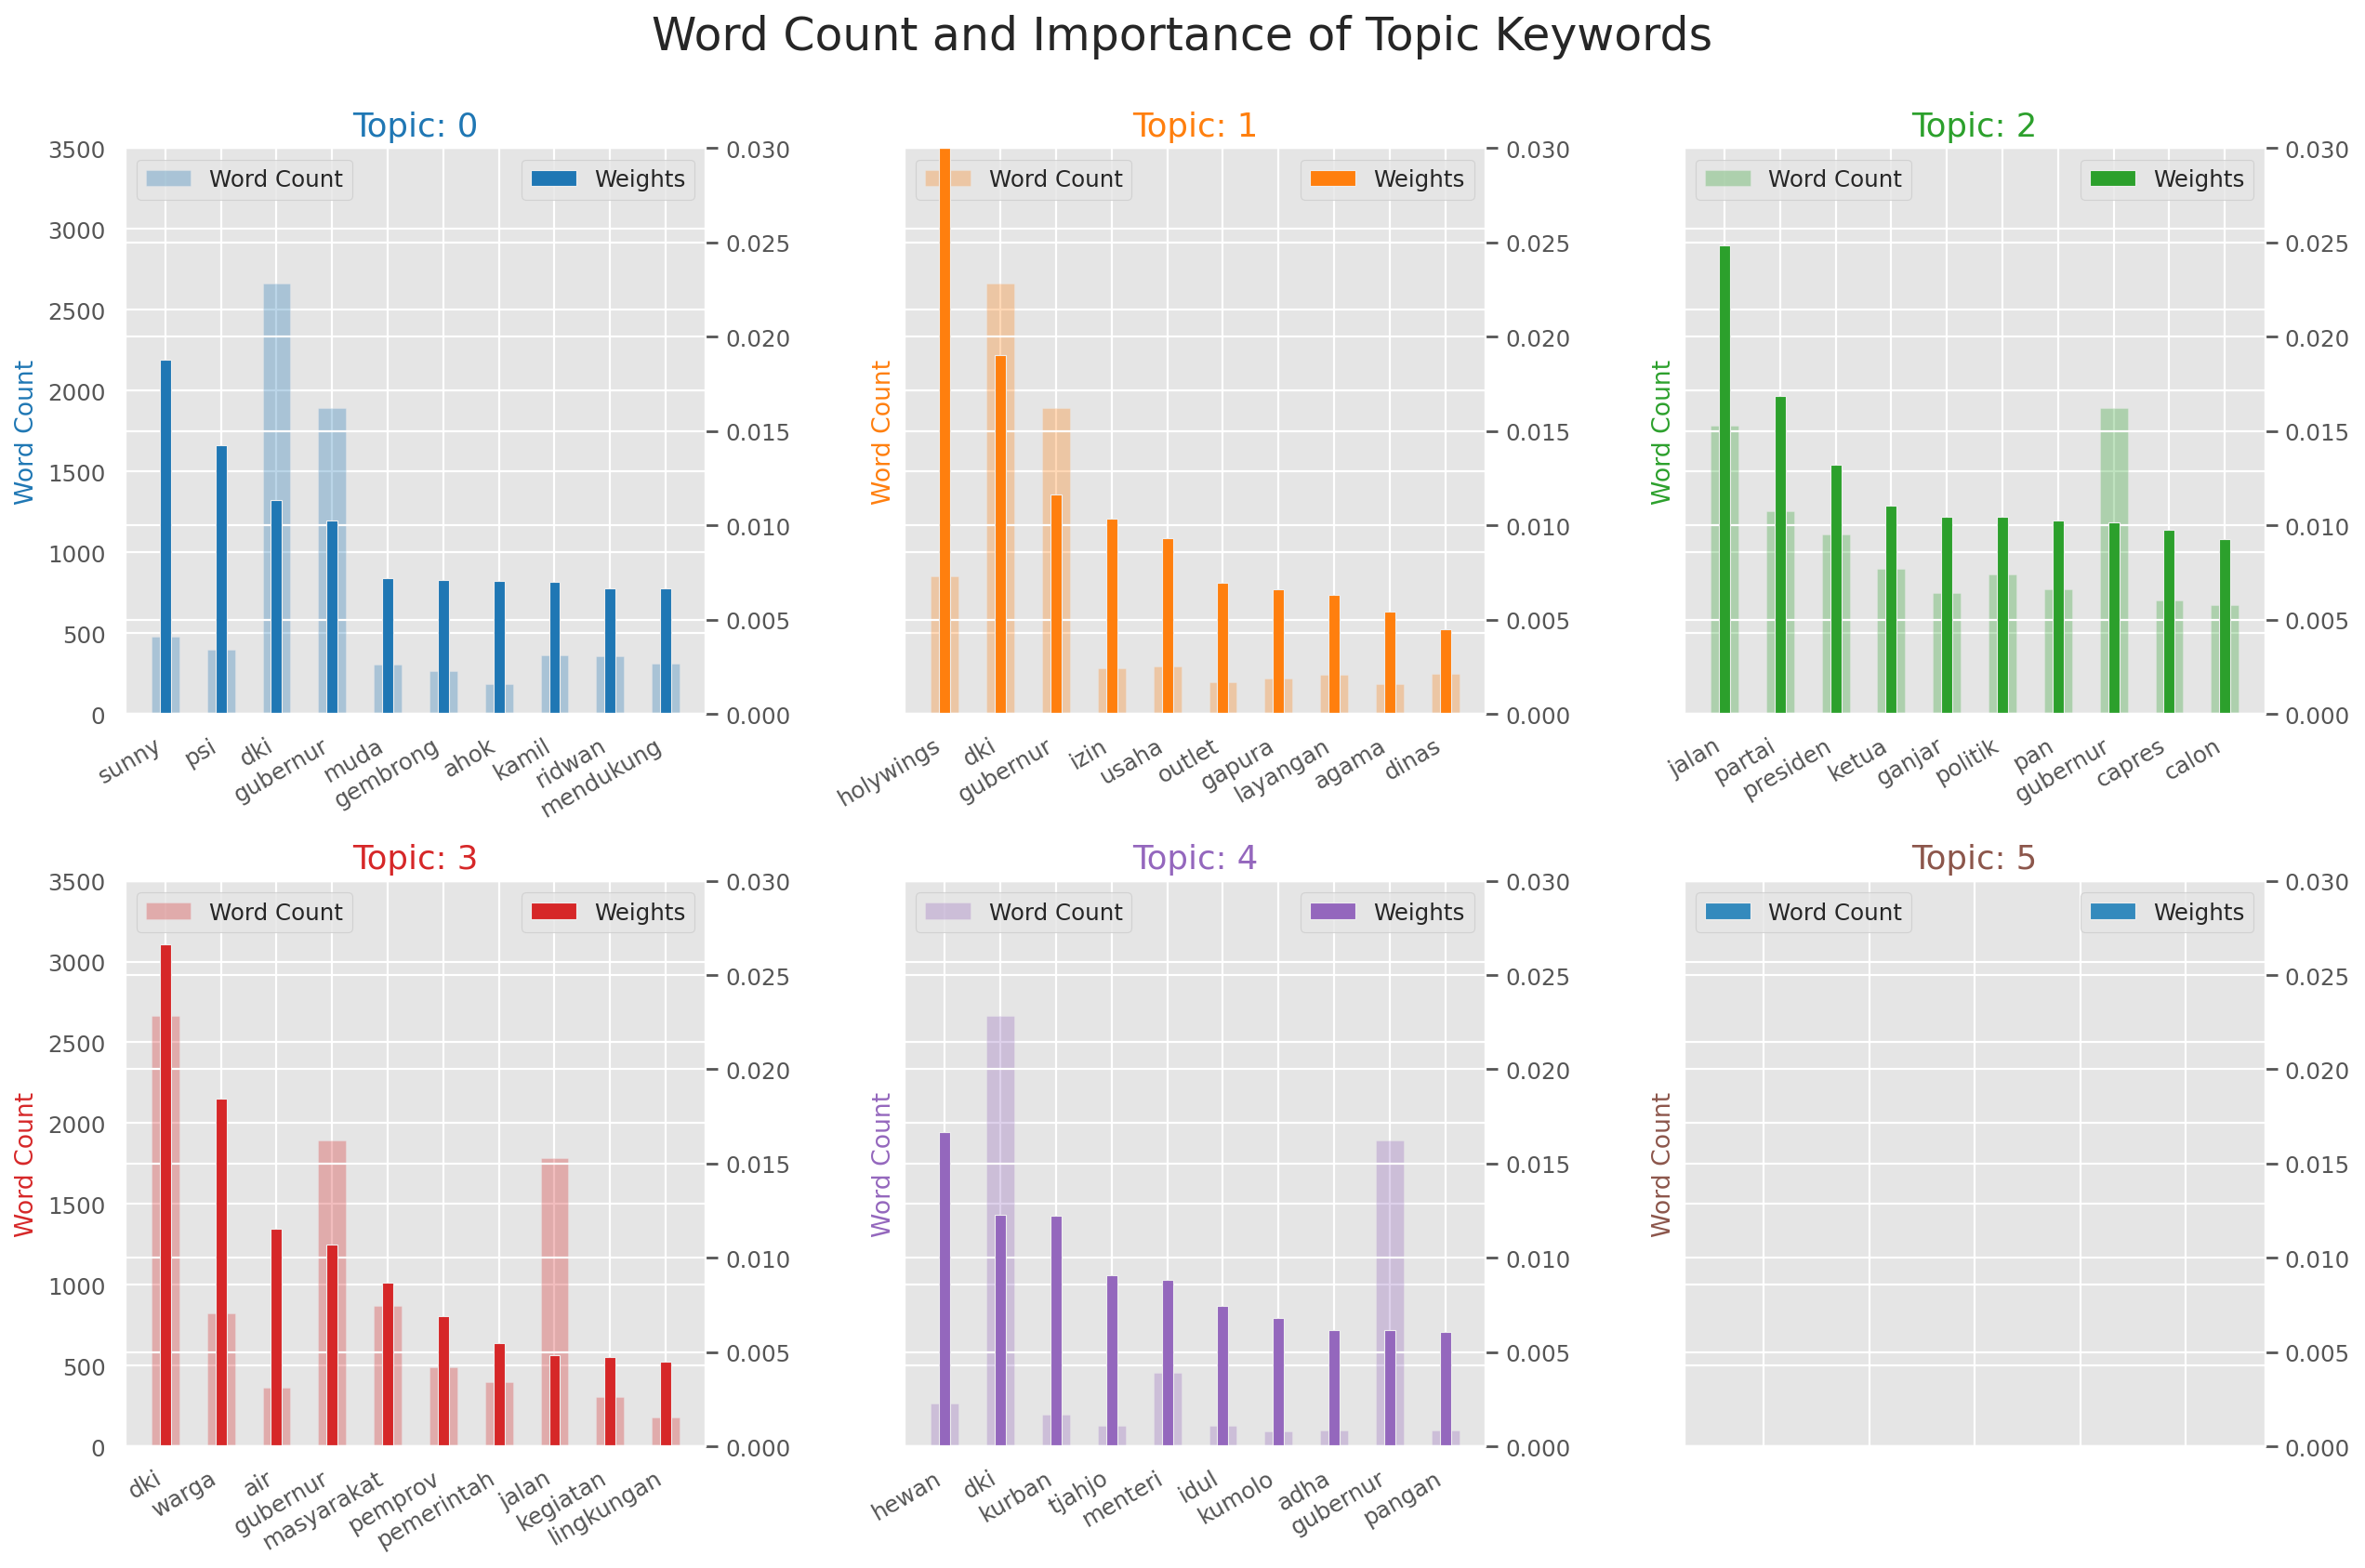

In [ ]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data['lemmatized'] for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 3, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)
plt.show()

In [ ]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=doc_term_matrix, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1]
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1,
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()

In [ ]:
lsa_model.print_topics()

[(0,
  '-0.725*"jalan" + -0.305*"dki" + -0.189*"gubernur" + -0.164*"warga" + -0.162*"perubahan" + -0.128*"masyarakat" + -0.125*"partai" + -0.111*"tokoh" + -0.100*"betawi" + -0.091*"ketua"'),
 (1,
  '-0.462*"jalan" + 0.355*"partai" + 0.224*"presiden" + 0.187*"politik" + 0.164*"capres" + 0.162*"ketua" + 0.162*"pan" + 0.162*"ganjar" + 0.153*"calon" + 0.141*"persen"'),
 (2,
  '-0.502*"dki" + -0.399*"holywings" + 0.279*"jalan" + 0.227*"partai" + -0.163*"gubernur" + -0.131*"usaha" + -0.129*"izin" + -0.118*"pemprov" + 0.103*"presiden" + 0.102*"capres"'),
 (3,
  '0.593*"pan" + 0.227*"dpd" + 0.201*"erick" + -0.200*"politik" + -0.197*"partai" + 0.193*"rakerda" + 0.180*"thohir" + 0.160*"dpw" + -0.150*"pdip" + -0.134*"sunny"'),
 (4,
  '-0.597*"holywings" + -0.173*"usaha" + -0.170*"izin" + -0.151*"partai" + 0.148*"air" + -0.144*"outlet" + 0.124*"udara" + 0.117*"masyarakat" + 0.116*"warga" + -0.112*"jalan"')]

In [ ]:
topics

[(0,
  [('jalan', -0.7248070725440492),
   ('dki', -0.3052730821019835),
   ('gubernur', -0.18933740278660335),
   ('warga', -0.1640544874371173),
   ('perubahan', -0.16237495987239955),
   ('masyarakat', -0.12778608187698745),
   ('partai', -0.12454701524059697),
   ('tokoh', -0.11097766761509563),
   ('betawi', -0.10012096415393876),
   ('ketua', -0.09063099236578981)]),
 (1,
  [('jalan', -0.4617485866100933),
   ('partai', 0.3551990676938996),
   ('presiden', 0.22398034293089125),
   ('politik', 0.1873258203357738),
   ('capres', 0.1640041781784855),
   ('ketua', 0.16235171526698933),
   ('pan', 0.16203868397693094),
   ('ganjar', 0.1620111231822806),
   ('calon', 0.15310285064701384),
   ('persen', 0.1405631712265558)]),
 (2,
  [('dki', -0.5021235001717184),
   ('holywings', -0.39918949601465836),
   ('jalan', 0.2794070408506677),
   ('partai', 0.22670588496354172),
   ('gubernur', -0.16282710022893848),
   ('usaha', -0.13111864699669504),
   ('izin', -0.1293688809434967),
   ('pem

IndexError: ignored

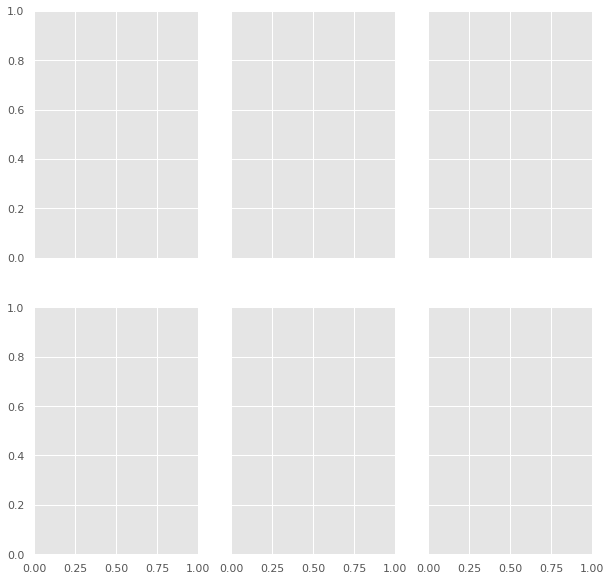

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lsa_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])

    topic_words

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# LDA 4 (Word2vec) - Generate sentence

In [ ]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [ ]:
%cd /content/drive/MyDrive/nolimit/topic_modelling/data_dashboard

/content/drive/MyDrive/nolimit/topic_modelling/data_dashboard


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/nolimit/topic_modelling/data_dashboard/sandiaga - Politik_OnlineMedia_30-Jun-2022_07-Jul-2022_nFmEbUNK96.csv', sep=';', usecols=['body'])

data.head()

,body
0,'Sijunjung | Topsumbar – Menparekraf Sandiaga Uno melakukan Visitasi Desa Wisata di Nagari Silok...
1,'Karawang: Relawan yang mengatasnamakan Sahabat Sandi Uno Karawang menggelar pelatihan kuliner b...
2,"'Warta Ekonomi, Jakarta - Lembaga survei Political Weather Station (PWS) merilis hasil survei k..."
3,"'Pariaman, InfoPublik - Walikota Pariaman, Genius Umar, didampingi Kadis Pariwisata Dwi Marhen Y..."
4,"'BNews–JATENG- – Diketahui bersama, Jawa Tengah terdiri dari 7.809 desa dan 753 kelurahan. Dan t..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    903 non-null    object
dtypes: object(1)
memory usage: 7.2+ KB


## Data Pre-Processing

In [ ]:
data

,body
0,'Sijunjung | Topsumbar – Menparekraf Sandiaga Uno melakukan Visitasi Desa Wisata di Nagari Silok...
1,'Karawang: Relawan yang mengatasnamakan Sahabat Sandi Uno Karawang menggelar pelatihan kuliner b...
2,"'Warta Ekonomi, Jakarta - Lembaga survei Political Weather Station (PWS) merilis hasil survei k..."
3,"'Pariaman, InfoPublik - Walikota Pariaman, Genius Umar, didampingi Kadis Pariwisata Dwi Marhen Y..."
4,"'BNews–JATENG- – Diketahui bersama, Jawa Tengah terdiri dari 7.809 desa dan 753 kelurahan. Dan t..."
...,...
1048,'JAKARTA - Menteri Pariwisata dan Ekonomi Kreatif Sandiaga Uno menginginkan masyarakat di Pulau ...
1049,"'VIVA Lifestyle – Artikel terkait dampak kurang baik menyekolahkan anak terlalu dini, disukai pe..."
1050,"'BLITAR, iNews.id - Menteri Pariwisata dan Ekonomi Kreatif (Menparekraf) Sandiaga Salahuddin Uno..."
1051,"'BLITAR - Menteri Pariwisata dan Ekonomi Kreatif atau Menparekraf Sandiaga Uno mengatakan, santr..."


In [ ]:
data['body'] = data['body'].str.lower()

In [ ]:
data[['source', 'text']] = data['body'].str.split('-', n=1, expand=True)

In [ ]:
data

,body,source,text
0,'sijunjung | topsumbar – menparekraf sandiaga uno melakukan visitasi desa wisata di nagari silok...,'sijunjung | topsumbar – menparekraf sandiaga uno melakukan visitasi desa wisata di nagari silok...,"keren banget pastinya, demikian unggahan sandiaga uno. kunjungan menparekraf sandiaga uno ke de..."
1,'karawang: relawan yang mengatasnamakan sahabat sandi uno karawang menggelar pelatihan kuliner b...,'karawang: relawan yang mengatasnamakan sahabat sandi uno karawang menggelar pelatihan kuliner b...,emak serta millenial yang ingin memiliki usaha. tujuannya agar masyarakat di daerah dapat berkem...
2,"'warta ekonomi, jakarta - lembaga survei political weather station (pws) merilis hasil survei k...","'warta ekonomi, jakarta",lembaga survei political weather station (pws) merilis hasil survei kinerja menteri dan menter...
3,"'pariaman, infopublik - walikota pariaman, genius umar, didampingi kadis pariwisata dwi marhen y...","'pariaman, infopublik","walikota pariaman, genius umar, didampingi kadis pariwisata dwi marhen yono menghadiri pameran ..."
4,"'bnews–jateng- – diketahui bersama, jawa tengah terdiri dari 7.809 desa dan 753 kelurahan. dan t...",'bnews–jateng,"– diketahui bersama, jawa tengah terdiri dari 7.809 desa dan 753 kelurahan. dan tahukah kalian ..."
...,...,...,...
1048,'jakarta - menteri pariwisata dan ekonomi kreatif sandiaga uno menginginkan masyarakat di pulau ...,'jakarta,menteri pariwisata dan ekonomi kreatif sandiaga uno menginginkan masyarakat di pulau kelapa unt...
1049,"'viva lifestyle – artikel terkait dampak kurang baik menyekolahkan anak terlalu dini, disukai pe...","'viva lifestyle – artikel terkait dampak kurang baik menyekolahkan anak terlalu dini, disukai pe...",None
1050,"'blitar, inews.id - menteri pariwisata dan ekonomi kreatif (menparekraf) sandiaga salahuddin uno...","'blitar, inews.id",menteri pariwisata dan ekonomi kreatif (menparekraf) sandiaga salahuddin uno mengunjungi pondok...
1051,"'blitar - menteri pariwisata dan ekonomi kreatif atau menparekraf sandiaga uno mengatakan, santr...",'blitar,"menteri pariwisata dan ekonomi kreatif atau menparekraf sandiaga uno mengatakan, santri harus m..."


In [ ]:
# # hapus source name

# source_name = pd.read_csv('/content/drive/MyDrive/nolimit/topic_modelling/source_name.txt')
# source_name = source_name['source_name'].tolist()

# data['text'] = pd.DataFrame(data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (source_name)])))

In [ ]:
data['text'] = data['text'].astype(str)

In [ ]:
import re
import string

def clean_text(text):
  text = text.lower() #lowercase atau case folding
  text = re.sub('@[^\s]+', '', text) #remove username
  text = re.sub('\[.*?\]', '', text) # remove square brackets
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text) # remove URLs
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove punctuation
  text = re.sub('\w*\d\w*', '', text)
  text = re.sub('[‘’“”…]', '', text)
  text = re.sub('\n', '', text)
  return text

clean1 = lambda x: clean_text(x)

data['text'] = pd.DataFrame(data['text'].apply(clean1))

In [ ]:
data

,body,source,text
0,'sijunjung | topsumbar – menparekraf sandiaga uno melakukan visitasi desa wisata di nagari silok...,'sijunjung | topsumbar – menparekraf sandiaga uno melakukan visitasi desa wisata di nagari silok...,keren banget pastinya demikian unggahan sandiaga uno kunjungan menparekraf sandiaga uno ke desa...
1,'karawang: relawan yang mengatasnamakan sahabat sandi uno karawang menggelar pelatihan kuliner b...,'karawang: relawan yang mengatasnamakan sahabat sandi uno karawang menggelar pelatihan kuliner b...,emak serta millenial yang ingin memiliki usaha tujuannya agar masyarakat di daerah dapat berkemb...
2,"'warta ekonomi, jakarta - lembaga survei political weather station (pws) merilis hasil survei k...","'warta ekonomi, jakarta",lembaga survei political weather station pws merilis hasil survei kinerja menteri dan menteri ...
3,"'pariaman, infopublik - walikota pariaman, genius umar, didampingi kadis pariwisata dwi marhen y...","'pariaman, infopublik",walikota pariaman genius umar didampingi kadis pariwisata dwi marhen yono menghadiri pameran ap...
4,"'bnews–jateng- – diketahui bersama, jawa tengah terdiri dari 7.809 desa dan 753 kelurahan. dan t...",'bnews–jateng,– diketahui bersama jawa tengah terdiri dari desa dan kelurahan dan tahukah kalian desa terti...
...,...,...,...
1048,'jakarta - menteri pariwisata dan ekonomi kreatif sandiaga uno menginginkan masyarakat di pulau ...,'jakarta,menteri pariwisata dan ekonomi kreatif sandiaga uno menginginkan masyarakat di pulau kelapa unt...
1049,"'viva lifestyle – artikel terkait dampak kurang baik menyekolahkan anak terlalu dini, disukai pe...","'viva lifestyle – artikel terkait dampak kurang baik menyekolahkan anak terlalu dini, disukai pe...",none
1050,"'blitar, inews.id - menteri pariwisata dan ekonomi kreatif (menparekraf) sandiaga salahuddin uno...","'blitar, inews.id",menteri pariwisata dan ekonomi kreatif menparekraf sandiaga salahuddin uno mengunjungi pondok p...
1051,"'blitar - menteri pariwisata dan ekonomi kreatif atau menparekraf sandiaga uno mengatakan, santr...",'blitar,menteri pariwisata dan ekonomi kreatif atau menparekraf sandiaga uno mengatakan santri harus ma...


In [ ]:
my_file = open("/content/drive/MyDrive/nolimit/stopwords1.txt", "r")
stopwords_x = my_file.read()
# print(stopwords_x )

stopwords_list = stopwords_x.split(",")
my_file.close()

# print(stopwords_list)

In [ ]:
tambahan = ['yuk', 'moga', 'c', 'ya', 'yg', 'ga', 'kak', 'nya', 'the', 'to', 'and',
            "gak", "min", "udah", "aj", "aja", "pake", 'tol', 'bsi', 'dr', 'tp', 'jam',
            "a", "sampe", "nih", "cek", "dm", "bgt", 'kalo', 'nih', 'up', 'gue', 'banget', 'si', 'amp',
            "kota", "jabar", "provinsi", "nama", "indonesia", "bogor", "bandung", "kabupaten",
            'tribunnewscom', 'jakarta', 'in', 'be', 'of', 'ktt', 'anies', 'baswedan', 'sandiaga', 'uno',
            'sandiagauno', 'ridwan', 'kamil', 'ridwankamil', 'prabowo', 'ganjar']

In [ ]:
# my_file = open("/content/drive/MyDrive/nolimit/topic_modelling/kota-kabupaten.txt", "r")
# kota = my_file. readlines()
# kota = [word.strip() for word in kota]
# kota

kota = []
with open("/content/drive/MyDrive/nolimit/topic_modelling/kota-kabupaten.txt", "r") as fileinput:
   for line in fileinput:
       kota.append(line.lower())

kota = [word.strip() for word in kota]
# kota

In [ ]:
tambahan.extend(kota)

In [ ]:
stopwords_list.extend(tambahan)

In [ ]:
# data['text'] = data['body'].astype(str).str.lower()
data['text'] = data['text'].str.replace('\d+', '')

In [ ]:
data

,body,source,text
0,'sijunjung | topsumbar – menparekraf sandiaga uno melakukan visitasi desa wisata di nagari silok...,'sijunjung | topsumbar – menparekraf sandiaga uno melakukan visitasi desa wisata di nagari silok...,keren banget pastinya demikian unggahan sandiaga uno kunjungan menparekraf sandiaga uno ke desa...
1,'karawang: relawan yang mengatasnamakan sahabat sandi uno karawang menggelar pelatihan kuliner b...,'karawang: relawan yang mengatasnamakan sahabat sandi uno karawang menggelar pelatihan kuliner b...,emak serta millenial yang ingin memiliki usaha tujuannya agar masyarakat di daerah dapat berkemb...
2,"'warta ekonomi, jakarta - lembaga survei political weather station (pws) merilis hasil survei k...","'warta ekonomi, jakarta",lembaga survei political weather station pws merilis hasil survei kinerja menteri dan menteri ...
3,"'pariaman, infopublik - walikota pariaman, genius umar, didampingi kadis pariwisata dwi marhen y...","'pariaman, infopublik",walikota pariaman genius umar didampingi kadis pariwisata dwi marhen yono menghadiri pameran ap...
4,"'bnews–jateng- – diketahui bersama, jawa tengah terdiri dari 7.809 desa dan 753 kelurahan. dan t...",'bnews–jateng,– diketahui bersama jawa tengah terdiri dari desa dan kelurahan dan tahukah kalian desa terti...
...,...,...,...
1048,'jakarta - menteri pariwisata dan ekonomi kreatif sandiaga uno menginginkan masyarakat di pulau ...,'jakarta,menteri pariwisata dan ekonomi kreatif sandiaga uno menginginkan masyarakat di pulau kelapa unt...
1049,"'viva lifestyle – artikel terkait dampak kurang baik menyekolahkan anak terlalu dini, disukai pe...","'viva lifestyle – artikel terkait dampak kurang baik menyekolahkan anak terlalu dini, disukai pe...",none
1050,"'blitar, inews.id - menteri pariwisata dan ekonomi kreatif (menparekraf) sandiaga salahuddin uno...","'blitar, inews.id",menteri pariwisata dan ekonomi kreatif menparekraf sandiaga salahuddin uno mengunjungi pondok p...
1051,"'blitar - menteri pariwisata dan ekonomi kreatif atau menparekraf sandiaga uno mengatakan, santr...",'blitar,menteri pariwisata dan ekonomi kreatif atau menparekraf sandiaga uno mengatakan santri harus ma...


In [ ]:
#stopwords

from nltk.corpus import stopwords
nltk.download('stopwords')

sw = set().union(stopwords.words('indonesian'), stopwords_list)

data['text'] = pd.DataFrame(data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw)])))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data.head()

,body,source,text
0,'sijunjung | topsumbar – menparekraf sandiaga uno melakukan visitasi desa wisata di nagari silok...,'sijunjung | topsumbar – menparekraf sandiaga uno melakukan visitasi desa wisata di nagari silok...,keren pastinya unggahan kunjungan menparekraf desa wisata silokek menampilkan gerbang utama pras...
1,'karawang: relawan yang mengatasnamakan sahabat sandi uno karawang menggelar pelatihan kuliner b...,'karawang: relawan yang mengatasnamakan sahabat sandi uno karawang menggelar pelatihan kuliner b...,emak millenial memiliki usaha tujuannya masyarakat daerah berkembang membuka usaha mandiri ketua...
2,"'warta ekonomi, jakarta - lembaga survei political weather station (pws) merilis hasil survei k...","'warta ekonomi, jakarta",lembaga survei political weather station pws merilis hasil survei kinerja menteri menteri layak ...
3,"'pariaman, infopublik - walikota pariaman, genius umar, didampingi kadis pariwisata dwi marhen y...","'pariaman, infopublik",walikota genius umar didampingi kadis pariwisata dwi marhen yono menghadiri pameran apresiasi kr...
4,"'bnews–jateng- – diketahui bersama, jawa tengah terdiri dari 7.809 desa dan 753 kelurahan. dan t...",'bnews–jateng,– jawa desa kelurahan tahukah desa tertinggi jawa ribuan desa desa tertinggi terletak tepatnya d...


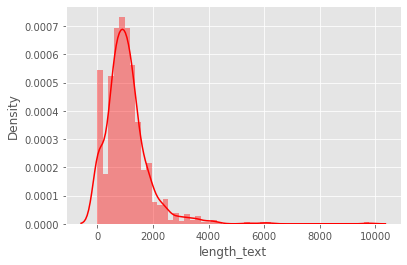

In [ ]:
data['length_text'] = data['text'].str.len()
sns.distplot(data['length_text'], color="r")
plt.show()

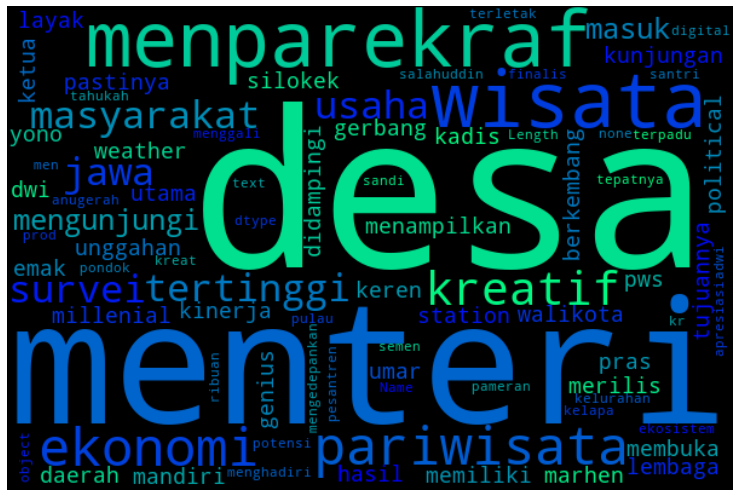

In [ ]:
cloud=WordCloud(colormap="winter",width=600,height=400).generate(str(data["text"]))
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

In [ ]:
import nltk
nltk.download('punkt')

data["tokenized"]=data["text"].apply(lambda x: nltk.word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data.head(1)

,body,source,text,length_text,tokenized
0,'sijunjung | topsumbar – menparekraf sandiaga uno melakukan visitasi desa wisata di nagari silok...,'sijunjung | topsumbar – menparekraf sandiaga uno melakukan visitasi desa wisata di nagari silok...,keren pastinya unggahan kunjungan menparekraf desa wisata silokek menampilkan gerbang utama pras...,238,"[keren, pastinya, unggahan, kunjungan, menparekraf, desa, wisata, silokek, menampilkan, gerbang,..."


In [ ]:
nltk.download('omw-1.4')

def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i,pos='v') for i in text]
    return lem_text
data["lemmatized"]=data["tokenized"].apply(lambda x: word_lemmatizer(x))
# data["lemmatize_joined"]=data["lemmatized"].apply(lambda x: ' '.join(x))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
data.head(1)

,body,source,text,length_text,tokenized,lemmatized
0,'sijunjung | topsumbar – menparekraf sandiaga uno melakukan visitasi desa wisata di nagari silok...,'sijunjung | topsumbar – menparekraf sandiaga uno melakukan visitasi desa wisata di nagari silok...,keren pastinya unggahan kunjungan menparekraf desa wisata silokek menampilkan gerbang utama pras...,238,"[keren, pastinya, unggahan, kunjungan, menparekraf, desa, wisata, silokek, menampilkan, gerbang,...","[keren, pastinya, unggahan, kunjungan, menparekraf, desa, wisata, silokek, menampilkan, gerbang,..."


In [ ]:
data['Number_of_words_for_cleaned'] = data['lemmatized'].apply(lambda x:len(str(x).split()))

Text(0.5, 1.0, 'Frequency distribution of number of words for each text extracted after removing stopwords and lemmatization')

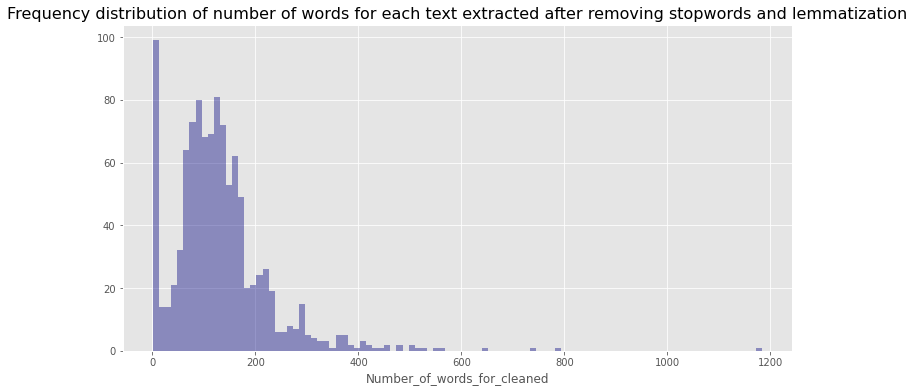

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.distplot(data['Number_of_words_for_cleaned'],kde = False, color= "navy", bins = 100)
plt.title("Frequency distribution of number of words for each text extracted after removing stopwords and lemmatization", size=16)

In [ ]:
# data.drop(data[data["Number_of_words_for_cleaned"]>750].index, inplace = True)

In [ ]:
# plt.style.use('ggplot')
# plt.figure(figsize=(12,6))
# sns.distplot(data['Number_of_words_for_cleaned'],kde = False, color= "orangered", bins = 100)
# plt.title("Frequency distribution of no of words in the documents after removing docs containing > 750 words", size=15)

In [ ]:
# plt.style.use('ggplot')
# plt.figure(figsize=(14,6))
# freq=pd.Series(" ".join(data["lemmatize_joined"]).split()).value_counts()[:30]
# freq.plot(kind="bar", color = "orangered")
# plt.title("30 most frequent words",size=20)

## Cluster

In [ ]:
data_ready = data['lemmatized'].tolist()

In [ ]:
# data_ready

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=5,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=10,
                                            passes=10,
                                            alpha='symmetric',
                                            iterations=100,
                                            per_word_topics=True)

# pprint(lda_model.print_topics())

In [ ]:
# lda_model.show_topics(num_words=50)

In [ ]:
tes = pd.DataFrame(lda_model.show_topics(num_words=50), columns=['topic', 'text'])

In [ ]:
tes

,topic,text
0,0,"0.069*""wisata"" + 0.059*""desa"" + 0.016*""agus"" + 0.016*""kelapa"" + 0.011*""semen"" + 0.010*""jawa"" + 0..."
1,1,"0.022*""presiden"" + 0.016*""partai"" + 0.016*""politik"" + 0.016*""persen"" + 0.013*""calon"" + 0.010*""me..."
2,2,"0.016*""penghargaan"" + 0.011*""maker"" + 0.011*""inews"" + 0.010*""award"" + 0.010*""kamis"" + 0.008*""bes..."
3,3,"0.029*""ekonomi"" + 0.022*""kreatif"" + 0.018*""umkm"" + 0.017*""sandi"" + 0.017*""pariwisata"" + 0.017*""m..."
4,4,"0.031*""pulau"" + 0.018*""pariwisata"" + 0.016*""seribu"" + 0.014*""kepulauan"" + 0.011*""masuk"" + 0.009*..."


In [ ]:
tes['text'] = tes['text'].astype(str)

In [ ]:
tes['text'] = tes['text'].apply(lambda x: x.replace('+',','))

In [ ]:
tes

,topic,text
0,0,"0.069*""wisata"" , 0.059*""desa"" , 0.016*""agus"" , 0.016*""kelapa"" , 0.011*""semen"" , 0.010*""jawa"" , 0..."
1,1,"0.022*""presiden"" , 0.016*""partai"" , 0.016*""politik"" , 0.016*""persen"" , 0.013*""calon"" , 0.010*""me..."
2,2,"0.016*""penghargaan"" , 0.011*""maker"" , 0.011*""inews"" , 0.010*""award"" , 0.010*""kamis"" , 0.008*""bes..."
3,3,"0.029*""ekonomi"" , 0.022*""kreatif"" , 0.018*""umkm"" , 0.017*""sandi"" , 0.017*""pariwisata"" , 0.017*""m..."
4,4,"0.031*""pulau"" , 0.018*""pariwisata"" , 0.016*""seribu"" , 0.014*""kepulauan"" , 0.011*""masuk"" , 0.009*..."


In [ ]:
tes['text'] = tes['text'].str.replace('*','')
tes['text'] = tes['text'].str.replace('.','')
tes['text'] = tes['text'].str.replace(' ','')
tes['text'] = tes['text'].str.replace('"','')
tes['text_fix'] = tes['text'].str.replace('\d+', '')

In [ ]:
tes

,topic,text,text_fix
0,0,"0069wisata,0059desa,0016agus,0016kelapa,0011semen,0010jawa,0009adwi,0009suro,0008anugerah,0008ku...","wisata,desa,agus,kelapa,semen,jawa,adwi,suro,anugerah,kunjungan,pariwisata,menteri,kedatangan,me..."
1,1,"0022presiden,0016partai,0016politik,0016persen,0013calon,0010media,0010pemilihan,0010sosial,0009...","presiden,partai,politik,persen,calon,media,pemilihan,sosial,pemilu,pilpres,ketua,terkait,juni,pe..."
2,2,"0016penghargaan,0011maker,0011inews,0010award,0010kamis,0008best,0007tarian,0007nasional,0007tou...","penghargaan,maker,inews,award,kamis,best,tarian,nasional,tourism,taman,institution,rp,economic,g..."
3,3,"0029ekonomi,0022kreatif,0018umkm,0017sandi,0017pariwisata,0017masyarakat,0011menparekraf,0011dig...","ekonomi,kreatif,umkm,sandi,pariwisata,masyarakat,menparekraf,digital,kerja,santri,lapangan,pelak..."
4,4,"0031pulau,0018pariwisata,0016seribu,0014kepulauan,0011masuk,0009event,0008industri,0008kawasan,0...","pulau,pariwisata,seribu,kepulauan,masuk,event,industri,kawasan,game,ken,pemerintah,daerah,wisata..."


In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.2972,"wisata, desa, agus, kelapa, semen, jawa, adwi, suro, anugerah, kunjungan","[keren, pastinya, unggahan, kunjungan, menparekraf, desa, wisata, silokek, menampilkan, gerbang,..."
1,1,3.0,0.7112,"ekonomi, kreatif, umkm, sandi, pariwisata, masyarakat, menparekraf, digital, kerja, santri","[emak, millenial, memiliki, usaha, tujuannya, masyarakat, daerah, berkembang, membuka, usaha, ma..."
2,2,1.0,0.5609,"presiden, partai, politik, persen, calon, media, pemilihan, sosial, pemilu, pilpres","[lembaga, survei, political, weather, station, pws, merilis, hasil, survei, kinerja, menteri, me..."
3,3,3.0,0.8777,"ekonomi, kreatif, umkm, sandi, pariwisata, masyarakat, menparekraf, digital, kerja, santri","[walikota, genius, umar, didampingi, kadis, pariwisata, dwi, marhen, yono, menghadiri, pameran, ..."
4,4,0.0,0.7203,"wisata, desa, agus, kelapa, semen, jawa, adwi, suro, anugerah, kunjungan","[–, jawa, desa, kelurahan, tahukah, desa, tertinggi, jawa, ribuan, desa, desa, tertinggi, terlet..."
5,5,1.0,0.7843,"presiden, partai, politik, persen, calon, media, pemilihan, sosial, pemilu, pilpres","[gema, pemilihan, presiden, pilpres, permukaan, dibicarakan, publik, media, namanama, namanama, ..."
6,6,1.0,0.7653,"presiden, partai, politik, persen, calon, media, pemilihan, sosial, pemilu, pilpres","[gema, pemilihan, presiden, pilpres, permukaan, dibicarakan, publik, media, namanama, namanama, ..."
7,7,1.0,0.9872,"presiden, partai, politik, persen, calon, media, pemilihan, sosial, pemilu, pilpres","[juni, terungkap, pasangan, subianto, pranowo, unggul, pasangan, simulasi, cigmark, duet, prabow..."
8,8,0.0,0.5307,"wisata, desa, agus, kelapa, semen, jawa, adwi, suro, anugerah, kunjungan","[anugerah, desa, wisata, adwi, kali, menyambangi, desa, wisata, green, talao, park, gtp, ulakan,..."
9,9,4.0,0.4531,"pulau, pariwisata, seribu, kepulauan, masuk, event, industri, kawasan, game, ken","[menteri, pariwisata, ekonomi, kreatif, menyambut, wisatawan, pengembara, digital, fasilitas, pe..."


In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)],
                                            axis=0)

# Reset Index
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9488,"wisata, desa, agus, kelapa, semen, jawa, adwi, suro, anugerah, kunjungan","[satunya, pembuat, saluang, bansi, desa, pariangan, menjualnya, ajo, feri, mengajarkan, mengukir..."
1,1.0,0.9914,"presiden, partai, politik, persen, calon, media, pemilihan, sosial, pemilu, pilpres","[tokoh, capres, parpol, pemilu, dirilis, rabu, diadakan, pilpres, tokoh, dipilih, presiden, ri, ..."
2,2.0,0.9851,"penghargaan, maker, inews, award, kamis, best, tarian, nasional, tourism, taman","[leisure, travelers, say, government, have, plan, issue, special, visa, since, early, but, it, b..."
3,3.0,0.9936,"ekonomi, kreatif, umkm, sandi, pariwisata, masyarakat, menparekraf, digital, kerja, santri","[menteri, pariwisata, ekonomi, kreatif, menparekraf, memanen, ratusan, kilo, ikan, lele, warga, ..."
4,4.0,0.9231,"pulau, pariwisata, seribu, kepulauan, masuk, event, industri, kawasan, game, ken","[wakil, gubernur, dki, ahmad, riza, patria, helipad, ditemukan, pulau, kepulauan, seribu, helipa..."


IndexError: ignored

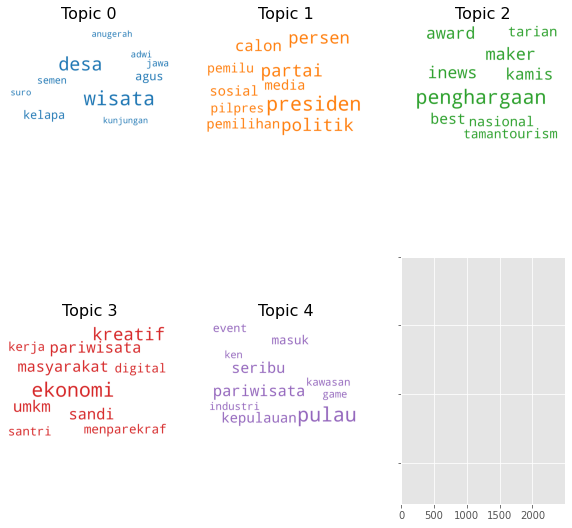

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=sw,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## Generate Sentence S-P-O

In [ ]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False)
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(','.join)
df_top3words.reset_index(level=0,inplace=True)

In [ ]:
df_top3words

,topic_id,words
0,0,"wisata,desa,agus"
1,1,"presiden,partai,politik"
2,2,"penghargaan,maker,inews"
3,3,"ekonomi,kreatif,umkm"
4,4,"pulau,pariwisata,seribu"


In [ ]:
hasil_df = tes

In [ ]:
hasil_df

,topic,text,text_fix
0,0,"0069wisata,0059desa,0016agus,0016kelapa,0011semen,0010jawa,0009adwi,0009suro,0008anugerah,0008ku...","wisata,desa,agus,kelapa,semen,jawa,adwi,suro,anugerah,kunjungan,pariwisata,menteri,kedatangan,me..."
1,1,"0022presiden,0016partai,0016politik,0016persen,0013calon,0010media,0010pemilihan,0010sosial,0009...","presiden,partai,politik,persen,calon,media,pemilihan,sosial,pemilu,pilpres,ketua,terkait,juni,pe..."
2,2,"0016penghargaan,0011maker,0011inews,0010award,0010kamis,0008best,0007tarian,0007nasional,0007tou...","penghargaan,maker,inews,award,kamis,best,tarian,nasional,tourism,taman,institution,rp,economic,g..."
3,3,"0029ekonomi,0022kreatif,0018umkm,0017sandi,0017pariwisata,0017masyarakat,0011menparekraf,0011dig...","ekonomi,kreatif,umkm,sandi,pariwisata,masyarakat,menparekraf,digital,kerja,santri,lapangan,pelak..."
4,4,"0031pulau,0018pariwisata,0016seribu,0014kepulauan,0011masuk,0009event,0008industri,0008kawasan,0...","pulau,pariwisata,seribu,kepulauan,masuk,event,industri,kawasan,game,ken,pemerintah,daerah,wisata..."


In [ ]:
hasil_df['text_fix'] = hasil_df['text_fix'].astype(str)

In [ ]:
# # stemming

# !pip install Sastrawi
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# text = sent_topics_sorteddf_mallet['Representative Text'].tolist()
# factory = StemmerFactory()
# stemming = factory.create_stemmer()

# output = [(stemming.stem(token)) for token in text]

In [ ]:
# hasil_df['stem_text'] = output

In [ ]:
kbbi = pd.read_csv('/content/drive/MyDrive/nolimit/topic_modelling/kata_kerja_kbbikatawebid.csv', names=['text'])

In [ ]:
kbbi

,text
0,0
1,aco
2,acu
3,acung
4,ada-ada saja
...,...
9496,wayuh
9497,wedar
9498,wenang
9499,wijaya


In [ ]:
kbbi['text'] = kbbi['text'].astype(str)

In [ ]:
# # stemming

# !pip install Sastrawi
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# text = kbbi['text'].tolist()
# factory = StemmerFactory()
# stemming = factory.create_stemmer()

# output = [(stemming.stem(token)) for token in text]

In [ ]:
# kbbi['stem'] = output

In [ ]:
kbbi[kbbi['text'] == 'mengunjungi']

,text
6005,mengunjungi


In [ ]:
# kbbi.to_csv('/content/drive/MyDrive/nolimit/topic_modelling/data_kbbi_clean1.csv', index=False)

In [ ]:
# !pip install --upgrade git+https://github.com/ariaghora/mpstemmer.git

In [ ]:
# !pip install python-Levenshtein

In [ ]:
# from mpstemmer import MPStemmer

# stemmer = MPStemmer()

In [ ]:
# print(stemmer.stem('kunjungan'))

In [ ]:
# #LEMMA KBBI

# kbbi['text_fix'] = kbbi['text'].apply(lambda x: [stemmer.stem(y) for y in x])

In [ ]:
hasil_df

,topic,text,text_fix
0,0,"0069wisata,0059desa,0016agus,0016kelapa,0011semen,0010jawa,0009adwi,0009suro,0008anugerah,0008ku...","wisata,desa,agus,kelapa,semen,jawa,adwi,suro,anugerah,kunjungan,pariwisata,menteri,kedatangan,me..."
1,1,"0022presiden,0016partai,0016politik,0016persen,0013calon,0010media,0010pemilihan,0010sosial,0009...","presiden,partai,politik,persen,calon,media,pemilihan,sosial,pemilu,pilpres,ketua,terkait,juni,pe..."
2,2,"0016penghargaan,0011maker,0011inews,0010award,0010kamis,0008best,0007tarian,0007nasional,0007tou...","penghargaan,maker,inews,award,kamis,best,tarian,nasional,tourism,taman,institution,rp,economic,g..."
3,3,"0029ekonomi,0022kreatif,0018umkm,0017sandi,0017pariwisata,0017masyarakat,0011menparekraf,0011dig...","ekonomi,kreatif,umkm,sandi,pariwisata,masyarakat,menparekraf,digital,kerja,santri,lapangan,pelak..."
4,4,"0031pulau,0018pariwisata,0016seribu,0014kepulauan,0011masuk,0009event,0008industri,0008kawasan,0...","pulau,pariwisata,seribu,kepulauan,masuk,event,industri,kawasan,game,ken,pemerintah,daerah,wisata..."


In [ ]:
hasil_df = hasil_df['text_fix'].str.split(',', expand=True).T

In [ ]:
hasil_df

,0,1,2,3,4
0,wisata,presiden,penghargaan,ekonomi,pulau
1,desa,partai,maker,kreatif,pariwisata
2,agus,politik,inews,umkm,seribu
3,kelapa,persen,award,sandi,kepulauan
4,semen,calon,kamis,pariwisata,masuk
5,jawa,media,best,masyarakat,event
6,adwi,pemilihan,tarian,menparekraf,industri
7,suro,sosial,nasional,digital,kawasan
8,anugerah,pemilu,tourism,kerja,game
9,kunjungan,pilpres,taman,santri,ken


In [ ]:
df_dominant_topic['Dominant_Topic'] = df_dominant_topic['Dominant_Topic'].astype(float)
df_dominant_topic['Dominant_Topic'] = df_dominant_topic['Dominant_Topic'].astype(int)

In [ ]:
topic = df_dominant_topic[df_dominant_topic['Dominant_Topic']==4]

In [ ]:
topic.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
9,9,4,0.4531,"pulau, pariwisata, seribu, kepulauan, masuk, event, industri, kawasan, game, ken","[menteri, pariwisata, ekonomi, kreatif, menyambut, wisatawan, pengembara, digital, fasilitas, pe..."
11,11,4,0.4354,"pulau, pariwisata, seribu, kepulauan, masuk, event, industri, kawasan, game, ken","[buka, pintu, digital, nomad, pekerja, digital, berpindahpindah, digital, nomad, wisata, ajakan,..."
12,12,4,0.4531,"pulau, pariwisata, seribu, kepulauan, masuk, event, industri, kawasan, game, ken","[menteri, pariwisata, ekonomi, kreatif, menyambut, wisatawan, pengembara, digital, fasilitas, pe..."
13,13,4,0.4531,"pulau, pariwisata, seribu, kepulauan, masuk, event, industri, kawasan, game, ken","[menteri, pariwisata, ekonomi, kreatif, menyambut, wisatawan, pengembara, digital, fasilitas, pe..."
14,14,4,0.4531,"pulau, pariwisata, seribu, kepulauan, masuk, event, industri, kawasan, game, ken","[menteri, pariwisata, ekonomi, kreatif, menyambut, wisatawan, pengembara, digital, fasilitas, pe..."


In [ ]:
topic = topic['Text'].explode().to_list()

In [ ]:
# topic

In [ ]:
# importing the module
import collections

# using Counter to find frequency of elements
freq_topic = collections.Counter(topic)

freq_topic = [key for key, _ in freq_topic.most_common()]

In [ ]:
# freq_topic

In [ ]:
# # lihat predikat dari keseluruhan data

# common_text = set(freq_topic).intersection(data_kbbi)
# predikat = list(common_text)
# print(predikat[0])

In [ ]:
# hasil

hasil_1predikat = sent_topics_sorteddf_mallet.drop(columns=['Representative Text'])

In [ ]:
data_kbbi = kbbi['text'].tolist()

In [ ]:
predikat = []

for i in range(5):
  topic = df_dominant_topic[df_dominant_topic['Dominant_Topic']==i]
  topic = topic['Text'].explode().to_list()

  freq_topic = collections.Counter(topic)
  freq_topic = [key for key, _ in freq_topic.most_common()]

  common_text = set(freq_topic).intersection(data_kbbi)
  list_predikat = list(common_text)
  print(list_predikat[0])

  predikat.append(list_predikat[0])

hasil_1predikat['top3word'] = df_top3words['words']
hasil_1predikat['predikat'] = predikat

melambung
melambung
melestarikan
mendoakan
berulang


In [ ]:
hasil_1predikat

,Topic_Num,Topic_Perc_Contrib,Keywords,top3word,predikat
0,0.0,0.9488,"wisata, desa, agus, kelapa, semen, jawa, adwi, suro, anugerah, kunjungan","wisata,desa,agus",melambung
1,1.0,0.9914,"presiden, partai, politik, persen, calon, media, pemilihan, sosial, pemilu, pilpres","presiden,partai,politik",melambung
2,2.0,0.9851,"penghargaan, maker, inews, award, kamis, best, tarian, nasional, tourism, taman","penghargaan,maker,inews",melestarikan
3,3.0,0.9936,"ekonomi, kreatif, umkm, sandi, pariwisata, masyarakat, menparekraf, digital, kerja, santri","ekonomi,kreatif,umkm",mendoakan
4,4.0,0.9231,"pulau, pariwisata, seribu, kepulauan, masuk, event, industri, kawasan, game, ken","pulau,pariwisata,seribu",berulang


In [ ]:
# coba output text dari Representative Text

output_text = sent_topics_sorteddf_mallet

In [ ]:
sentence = []

for i in range(5):
  sentence.append(output_text['Representative Text'][i][:10])

output_text['sentence'] = sentence

In [ ]:
output_text

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text,sentence
0,0.0,0.9488,"wisata, desa, agus, kelapa, semen, jawa, adwi, suro, anugerah, kunjungan","[satunya, pembuat, saluang, bansi, desa, pariangan, menjualnya, ajo, feri, mengajarkan, mengukir...","[satunya, pembuat, saluang, bansi, desa, pariangan, menjualnya, ajo, feri, mengajarkan]"
1,1.0,0.9914,"presiden, partai, politik, persen, calon, media, pemilihan, sosial, pemilu, pilpres","[tokoh, capres, parpol, pemilu, dirilis, rabu, diadakan, pilpres, tokoh, dipilih, presiden, ri, ...","[tokoh, capres, parpol, pemilu, dirilis, rabu, diadakan, pilpres, tokoh, dipilih]"
2,2.0,0.9851,"penghargaan, maker, inews, award, kamis, best, tarian, nasional, tourism, taman","[leisure, travelers, say, government, have, plan, issue, special, visa, since, early, but, it, b...","[leisure, travelers, say, government, have, plan, issue, special, visa, since]"
3,3.0,0.9936,"ekonomi, kreatif, umkm, sandi, pariwisata, masyarakat, menparekraf, digital, kerja, santri","[menteri, pariwisata, ekonomi, kreatif, menparekraf, memanen, ratusan, kilo, ikan, lele, warga, ...","[menteri, pariwisata, ekonomi, kreatif, menparekraf, memanen, ratusan, kilo, ikan, lele]"
4,4.0,0.9231,"pulau, pariwisata, seribu, kepulauan, masuk, event, industri, kawasan, game, ken","[wakil, gubernur, dki, ahmad, riza, patria, helipad, ditemukan, pulau, kepulauan, seribu, helipa...","[wakil, gubernur, dki, ahmad, riza, patria, helipad, ditemukan, pulau, kepulauan]"


## Optional

In [ ]:
# doc_lens = [len(d) for d in df_dominant_topic.Text]

# # Plot
# plt.figure(figsize=(16,7), dpi=160)
# plt.hist(doc_lens, bins = 1000, color='navy')
# plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
# plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
# plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
# plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
# plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

# plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
# plt.tick_params(size=16)
# plt.xticks(np.linspace(0,1000,9))
# plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
# plt.show()

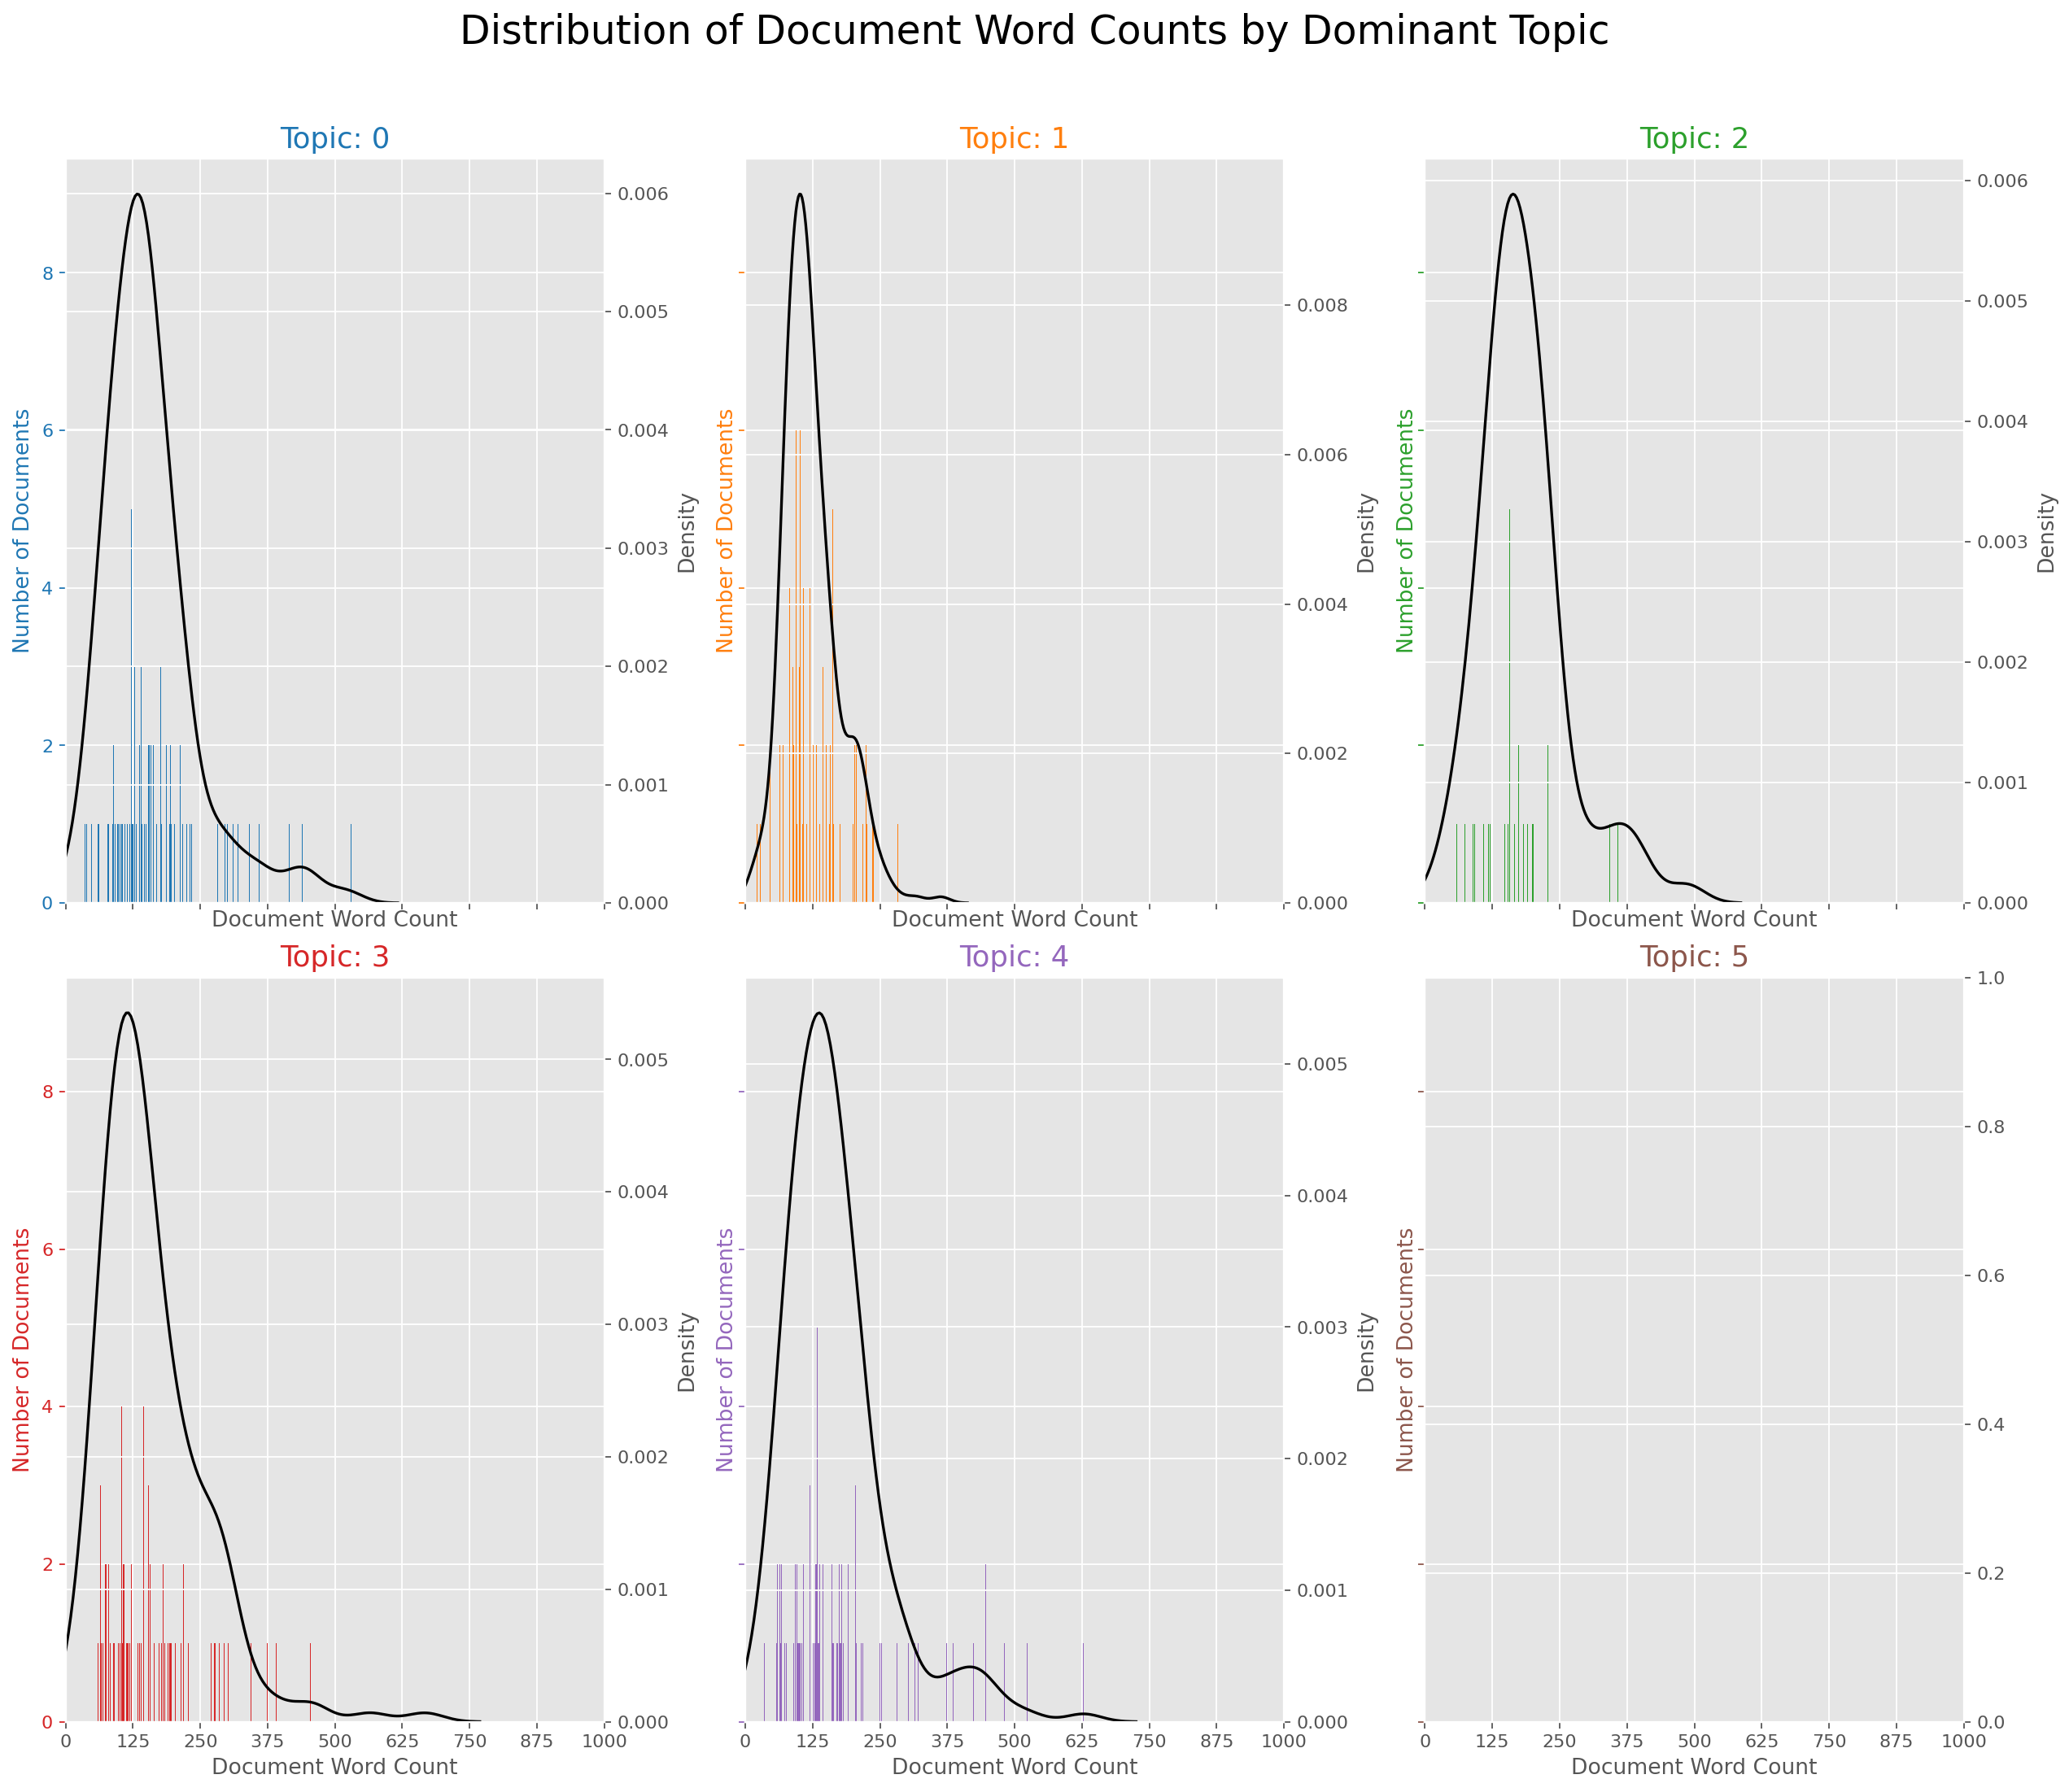

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,3,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

In [ ]:
!pip install pyldavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 32.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=a208e9fd11b71dd26f7b8066980cd4c650faa4b1aa04652f7750a5c29ca04f0c
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyldavis


In [ ]:
# cek info

from pyLDAvis.gensim_models import prepare
vis = prepare(lda_model, corpus, id2word, mds='tsne')
vis.topic_info

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


,Term,Freq,Total,Category,logprob,loglift
461,wisata,2394.000000,2394.000000,Default,30.0000,30.0000
9,desa,1971.000000,1971.000000,Default,29.0000,29.0000
2001,pulau,861.000000,861.000000,Default,28.0000,28.0000
452,umkm,939.000000,939.000000,Default,27.0000,27.0000
71,presiden,650.000000,650.000000,Default,26.0000,26.0000
...,...,...,...,...,...,...
94,acara,78.504112,226.486969,Topic5,-5.2885,1.2229
307,menteri,92.710829,1118.672501,Topic5,-5.1221,-0.2080
146,digital,77.515056,489.262066,Topic5,-5.3011,0.4400
687,nasional,70.029525,452.596682,Topic5,-5.4027,0.4164


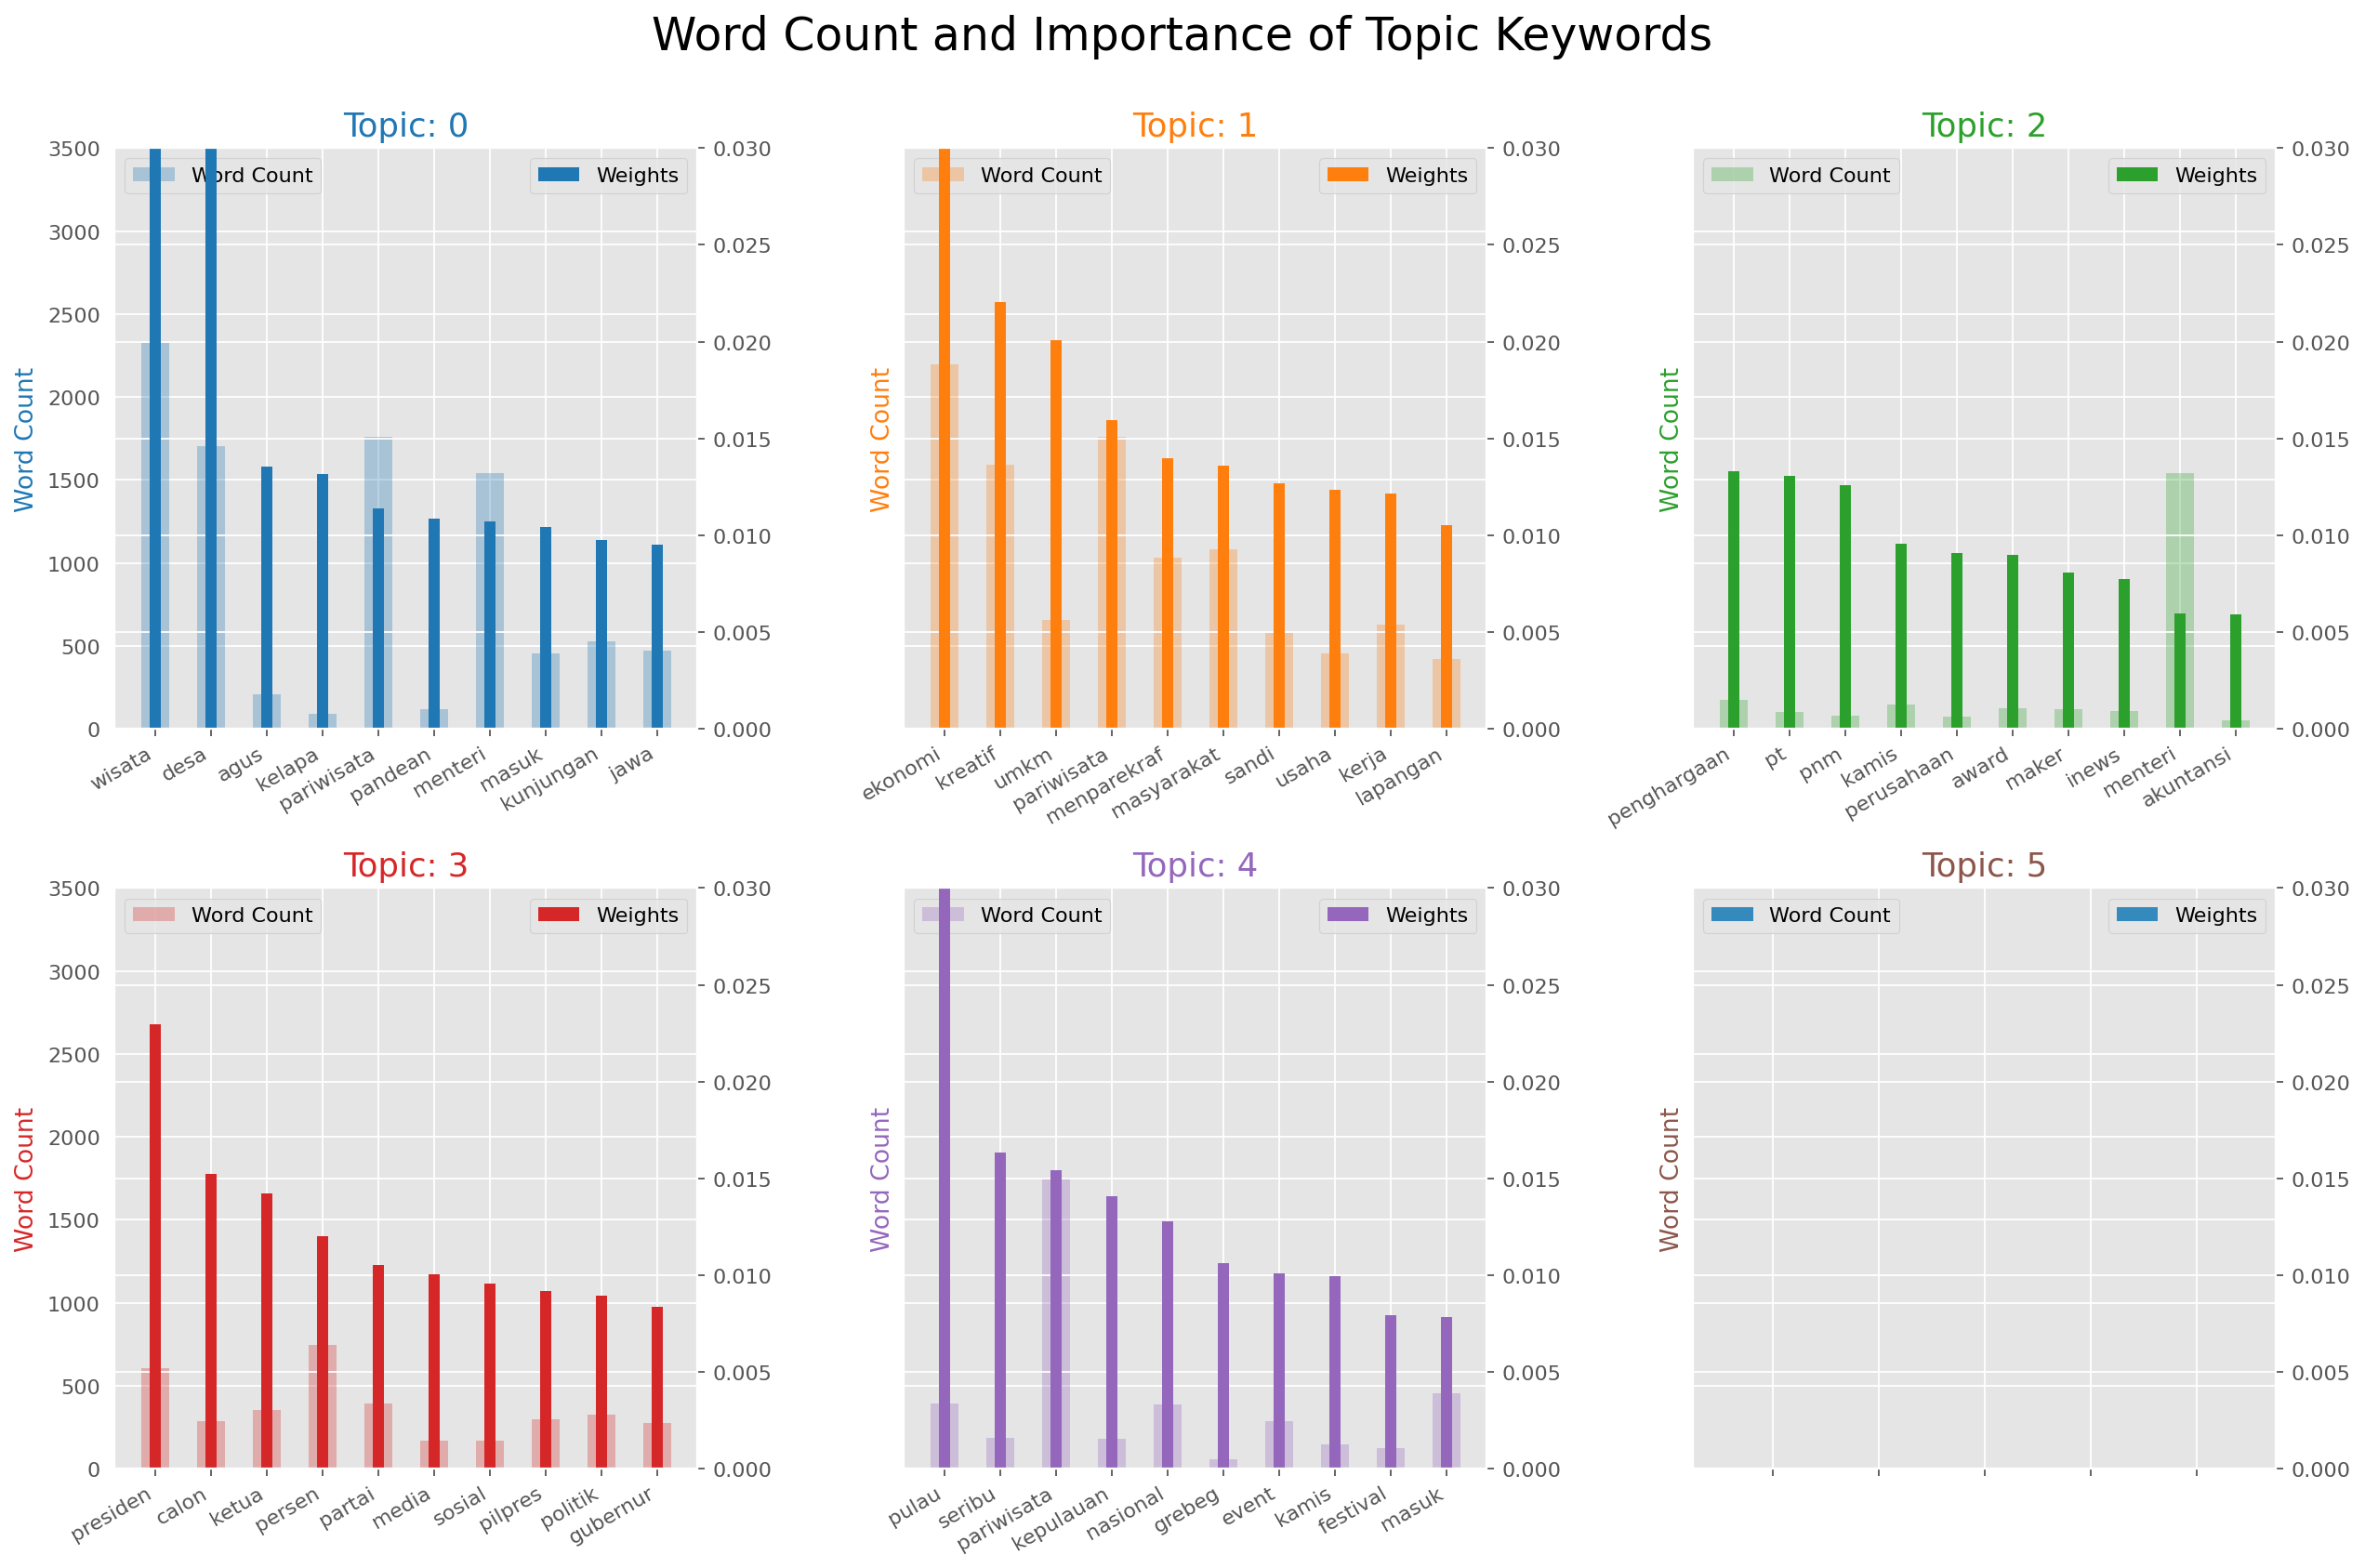

In [ ]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 3, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)
plt.show()

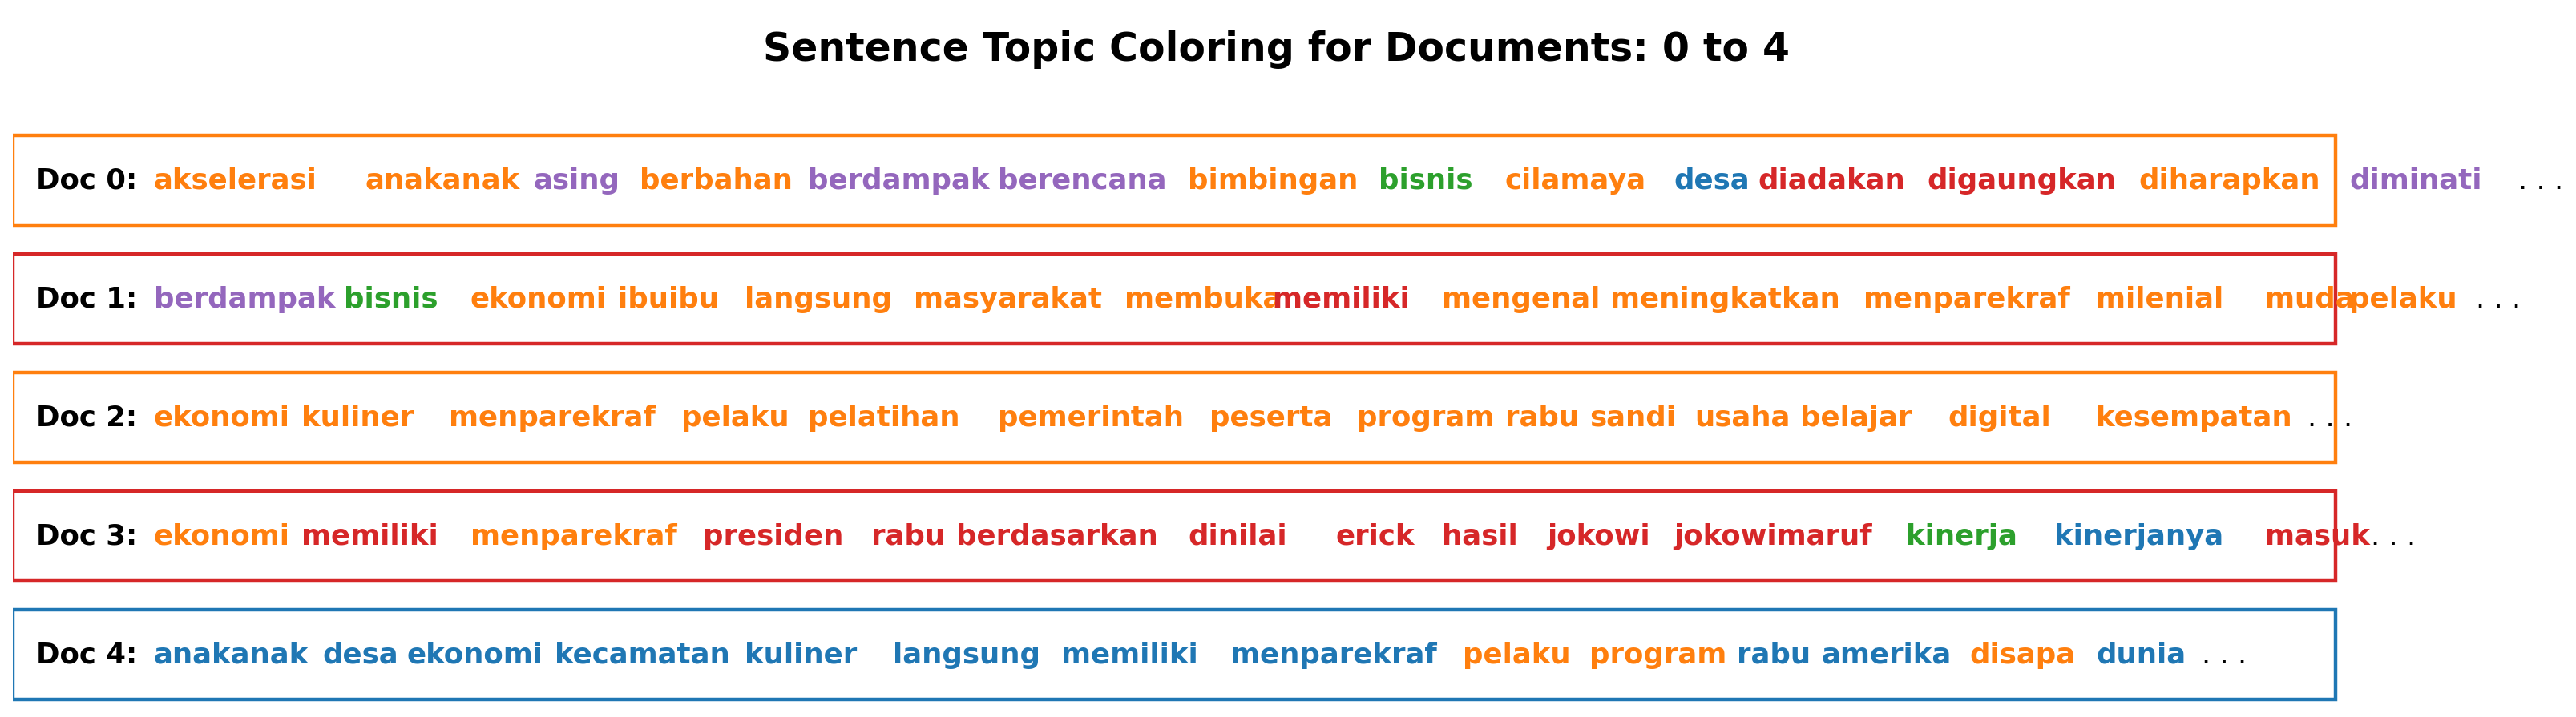

In [ ]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 6):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1]
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1,
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()

In [ ]:
topic_weightage_by_doc.sum()

0    224.781806
1    351.657312
2     85.979196
3    171.915606
4    171.467327
dtype: float64

In [ ]:
topic_weightage_by_doc

,0,1,2,3,4
0,0.089099,0.591910,0.116448,0.128023,0.074520
1,0.048036,0.297444,0.110986,0.460142,0.083391
2,0.039264,0.779198,0.041394,0.138413,NaN
3,0.027527,0.032700,0.205594,0.722907,0.011271
4,0.802440,0.157478,NaN,0.021466,0.017228
...,...,...,...,...,...
1004,0.022316,NaN,0.588223,NaN,0.383793
1005,0.453478,0.184343,0.017576,0.061617,0.282986
1006,0.099647,0.238667,0.192715,0.465921,NaN
1007,0.052295,0.719752,0.067556,0.158112,NaN


In [ ]:
df_topic_weightage_by_doc

,index,count
0,0,224.781806
1,1,351.657312
2,2,85.979196
3,3,171.915606
4,4,171.467327


In [ ]:
df_top3words

,topic_id,words
0,0,"wisata,desa,agus"
1,1,"ekonomi,kreatif,umkm"
2,2,"penghargaan,pt,pnm"
3,3,"presiden,calon,ketua"
4,4,"pulau,seribu,pariwisata"


In [ ]:
df_topic_weightage_by_doc.index.unique().__len__()

5

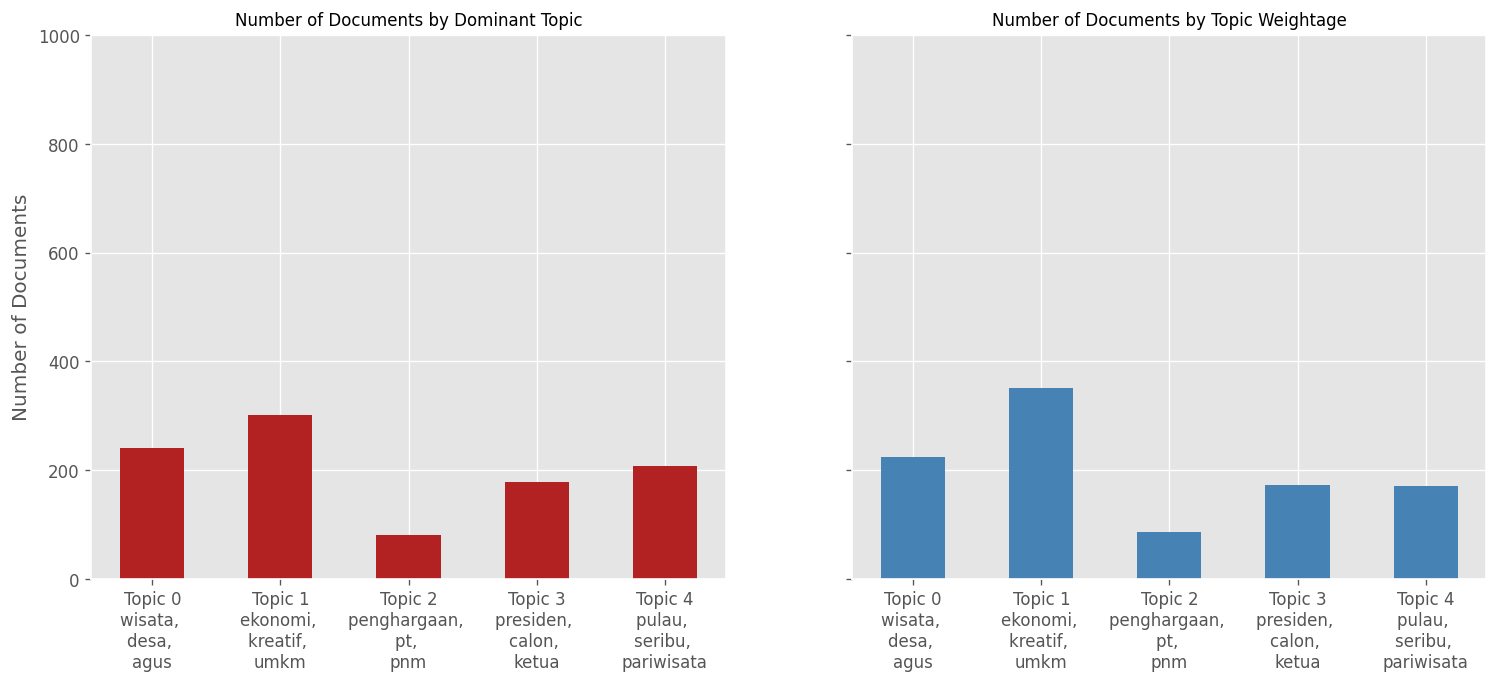

In [ ]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [ ]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics),
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 992 samples in 0.001s...
[t-SNE] Computed neighbors for 992 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 992 / 992
[t-SNE] Mean sigma: 0.038393
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.411392
[t-SNE] KL divergence after 1000 iterations: 0.379687


In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.230235 -0.020774       1        1  30.663838
0      0.184292  0.054556       2        1  22.653056
4     -0.032480 -0.177555       3        1  18.628220
3     -0.149290  0.268678       4        1  17.851528
2     -0.232757 -0.124905       5        1  10.203359, topic_info=          Term         Freq        Total Category  logprob  loglift
461     wisata  2394.000000  2394.000000  Default  30.0000  30.0000
9         desa  1971.000000  1971.000000  Default  29.0000  29.0000
2001     pulau   861.000000   861.000000  Default  28.0000  28.0000
452       umkm   939.000000   939.000000  Default  27.0000  27.0000
71    presiden   650.000000   650.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
94       acara    78.504062   226.486992   Topic5  -5.2885   1.2229
307    menteri    92.710769  1118.672557   Topic5  -5.1221  -0.2080
146    digital    77.515006   489.262222   Topic5  -5.3011   0.4400
687   nasional    70.029480   452.596487   Topic5  -5.4027   0.4164
1301     nilai    57.011271    81.542747   Topic5  -5.6084   1.9246

[270 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
94        1  0.649044      acara
94        5  0.348806      acara
574       2  0.996024       adwi
898       2  0.690738       agus
898       4  0.298139       agus
...     ...       ...        ...
9782      4  0.991597   warganet
9782      5  0.007870   warganet
7253      2  0.988736       watu
461       2  0.999881     wisata
641       2  0.997981  wisatawan

[346 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 4, 3])